# Assignment-4

**ABSTRACT**

The objective was to develop a reliable model for accurately predicting hunting prices.

With this model, we can gain insight into the motivations underlying the choice to hunt a particular type or rarity of large mammal, as well as examine correlations with variables such as body size, carnivory and classification, conservation status, and geographical location

The model was then applied to the Hunting Prices dataset for testing. Analysis of the data and model testing revealed that the linear regression approach can effectively predict and analyze housing prices to a certain degree. However, further improvements can be made by exploring more advanced machine learning techniques.

**DATASET**

The dataset can be found here - https://www.kaggle.com/datasets/thedevastator/hunt-prices-for-north-american-mammals

This dataset provides information on the cost and duration of guided hunts for fifteen different North American large mammal species, allowing for exploration of costly signaling theory

Notes on Specific Variables:

Species: The name of the species of mammal being hunted. (Text)

Province/State: The province or state in which the hunt took place. (Text)

Price: The total cost of the hunt. (Numerical)

Number of days: The number of days the hunt lasted. (Numerical)

Day price: The cost per day of the hunt. (Numerical)

S Rank: The rarity of the species being hunted. (Numerical)

Status: The conservation status of the species being hunted. (Text)

Classification: The classification of the species being hunted (carnivore, omnivore, or herbivore). (Text)

Avg Mass: The average mass of the species being hunted. (Numerical)

SCI: The Safari Club International score of the species being hunted. (Numerical)

Latitude: The latitude of the location where the hunt took place. (Numerical)

**Importing Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random
import os
import sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV

In [ ]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

**Importing the Dataset**

In [ ]:
url = "https://raw.githubusercontent.com/vineethreddy2000/Assignment-1_DS/main/Mihalikdata.csv"
data = pd.read_csv(url)
data.head()

Species Province/State  Price  Number of days  Day price S Rank  \
0  Mountain Lion        Alberta  15930            10.0       1593     S4   
1  Mountain Lion        Alberta   9500            10.0        950     S4   
2  Mountain Lion        Alberta  10000            10.0       1000     S4   
3  Mountain Lion        Alberta  12500            10.0       1250     S4   
4  Mountain Lion        Arizona   5000             5.0       1000     S4   

   Status Classification  Avg Mass SCI  Latitude  
0     4.0      Carnivore      60.4   Y   54.5000  
1     4.0      Carnivore      60.4   Y   54.5000  
2     4.0      Carnivore      60.4   Y   54.5000  
3     4.0      Carnivore      60.4   Y   54.5000  
4     4.0      Carnivore      60.4   Y   34.1661

In [ ]:
data.dtypes.value_counts()

object     5
float64    4
int64      2
Name: count, dtype: int64

What are the data types? (Only numeric and categorical)

We have 3 data types for the given data. 5 columns: (Species, Province/State, S Rank, Classification, SCI) have categorical data type. 4 columns: (Number of days, Status, Avg Mass, Latitude) have numerical (float) data type. 2 colomns: (Price, Day price) have numerical (int) data type.

In [ ]:
# checking if the any data is missing
data.isnull().sum()

Species            0
Province/State     0
Price              0
Number of days     0
Day price          0
S Rank            47
Status            47
Classification     0
Avg Mass           0
SCI                0
Latitude           0
dtype: int64

Are there missing values?

Columns 'S Rank' and 'Status' have missing values. Values are missing for 47 records in these two columns.

In [ ]:
# Impute missing values in 'S Rank' with the mode (most frequent rank)
data['S Rank'].fillna(data['S Rank'].mode().iloc[0], inplace=True)
data['Status'].fillna(data['Status'].mode().iloc[0], inplace=True)

Imputing the missing values in 'S Rank' and 'Status' with mode

In [ ]:
data.isnull().sum()

Species           0
Province/State    0
Price             0
Number of days    0
Day price         0
S Rank            0
Status            0
Classification    0
Avg Mass          0
SCI               0
Latitude          0
dtype: int64

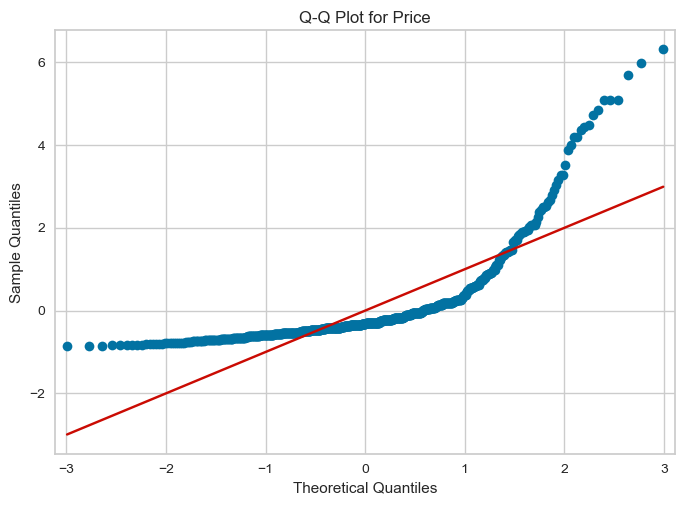

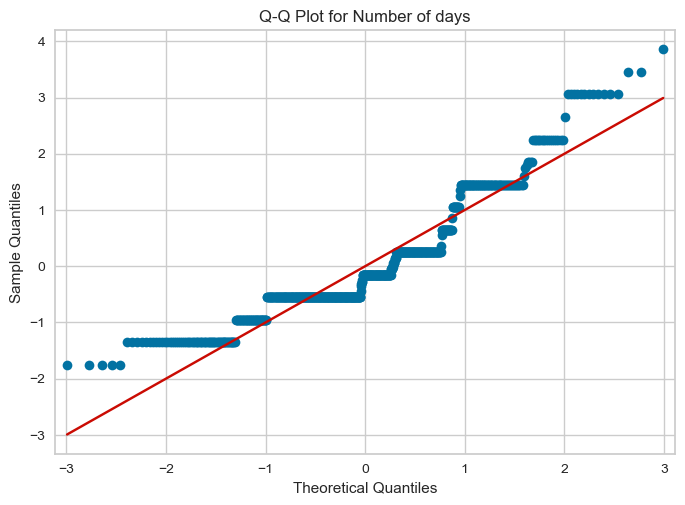

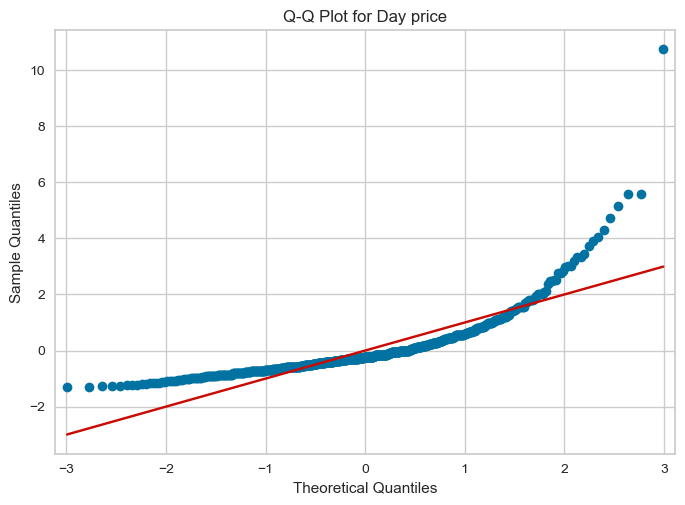

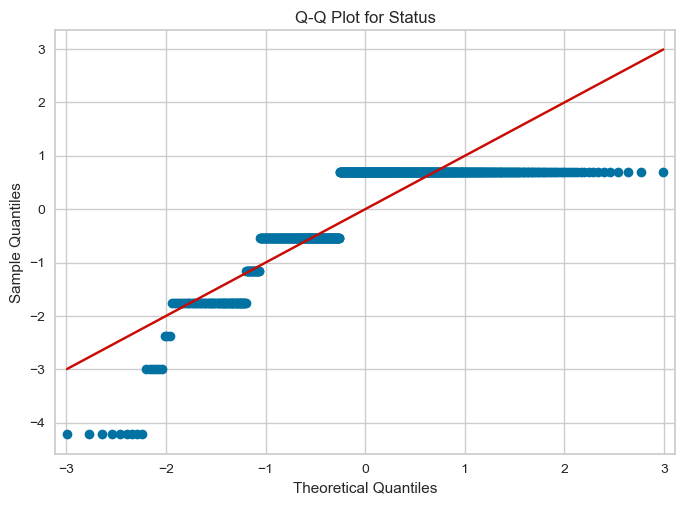

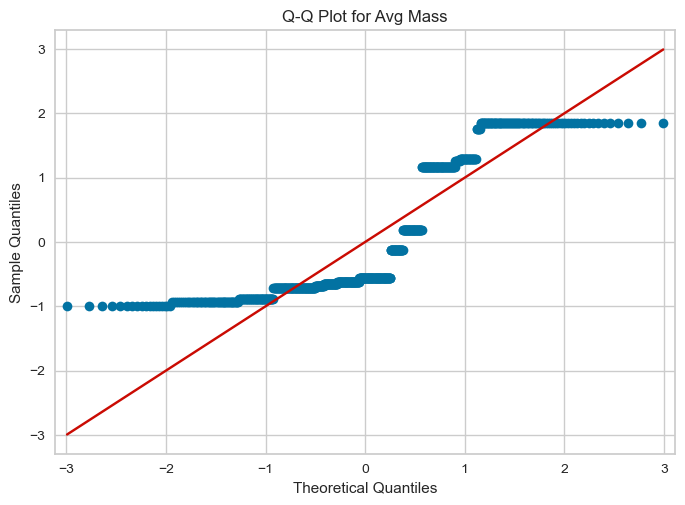

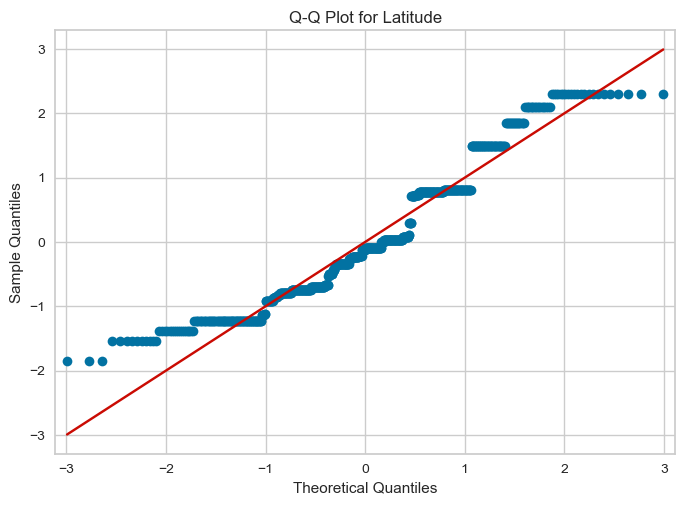

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming your dataset is stored in a variable named 'data'

# Select columns with numerical data
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create Q-Q plots for both 'Price' and other numerical columns
for column in numerical_columns:
    # Extract the column data
    column_data = data[column]

    # Create a Q-Q plot
    sm.qqplot(column_data, line='s', fit=True, dist=stats.norm, marker='o')
    plt.title(f'Q-Q Plot for {column}')
    plt.show()

What are the likely distributions of the numeric variables?¶

From the QQ plot above -

Price: The plot suggests that the distribution of 'Price' deviates from the normal distribution, especially at higher values.

Number of Days: This distribution also shows deviation from normality, with a skew towards lower values.

Day Price: Similar to 'Price', 'Day Price' shows deviation from a normal distribution, particularly at higher values.

Status: The distribution of 'Status' shows significant deviation from normality, indicating a categorical or discrete nature rather than continuous.

Avg Mass: This variable also does not follow a normal distribution, with more concentration in the lower range and a long tail towards higher values.

Latitude: The distribution of 'Latitude' seems to show some deviation from normality but is closer to a normal distribution than the others.

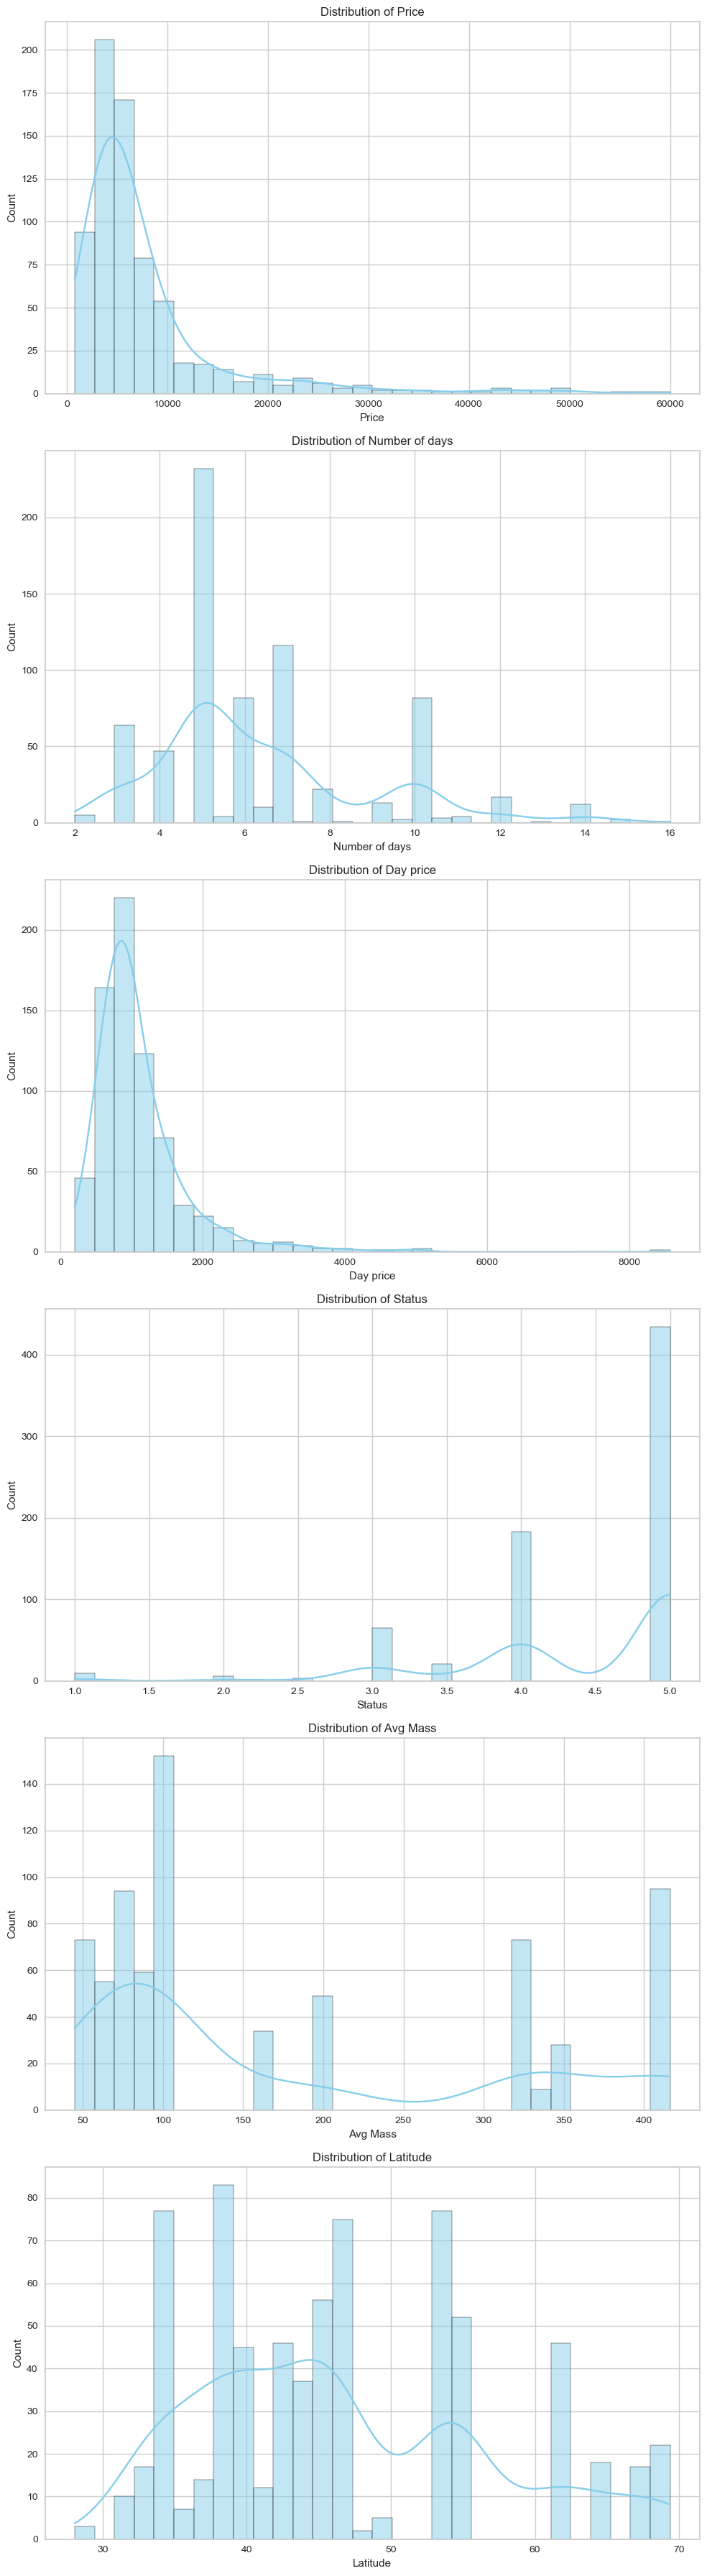

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a variable named 'data'

# Select columns with numerical data
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Set up subplots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 6 * len(numerical_columns)))

# Create histograms for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(data[column], ax=axes[i], kde=True, color='skyblue', bins=30)
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

<Axes: >

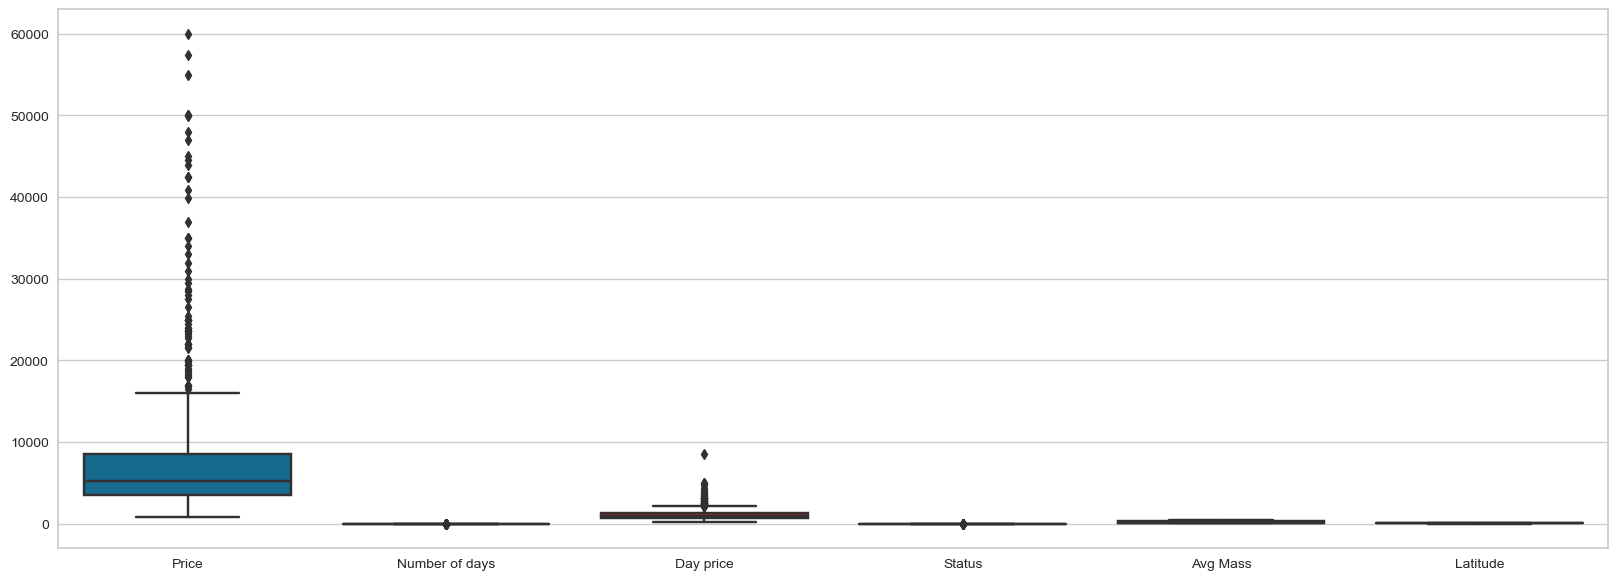

In [ ]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)

As it is hard to visualize and read the data, Normalizing the data to have a better understanding and visualization

In [ ]:
data = pd.get_dummies(data)


from sklearn.preprocessing import MinMaxScaler

# Identify numeric features
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns

# Create x to store scaled values as floats
x = data[numeric_features].values.astype(float)

# Preparing for normalizing
min_max_scaler = MinMaxScaler()

# Transform the data to fit min-max processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[numeric_features] = pd.DataFrame(x_scaled, columns=numeric_features)

In [ ]:
# data after nromalizing and feature creation
data.head()

Price  Number of days  Day price  Status  Avg Mass  Latitude  \
0  0.255574        0.571429   0.166408    0.75  0.041481  0.639951   
1  0.146959        0.571429   0.089595    0.75  0.041481  0.639951   
2  0.155405        0.571429   0.095568    0.75  0.041481  0.639951   
3  0.197635        0.571429   0.125433    0.75  0.041481  0.639951   
4  0.070946        0.214286   0.095568    0.75  0.041481  0.147818   

   Species_Bighorn Sheep  Species_Black Bear  Species_Brown Bear  \
0                  False               False               False   
1                  False               False               False   
2                  False               False               False   
3                  False               False               False   
4                  False               False               False   

   Species_Caribou  ...  S Rank_S2S3  S Rank_S3  S Rank_S3S4  S Rank_S4  \
0            False  ...        False      False        False       True   
1            False  ...        False      False        False       True   
2            False  ...        False      False        False       True   
3            False  ...        False      False        False       True   
4            False  ...        False      False        False       True   

   S Rank_S5  S Rank_S5   Classification_Carnivore  Classification_Ungulate  \
0      False       False                      True                    False   
1      False       False                      True                    False   
2      False       False                      True                    False   
3      False       False                      True                    False   
4      False       False                      True                    False   

   SCI_N  SCI_Y  
0  False   True  
1  False   True  
2  False   True  
3  False   True  
4  False   True  

[5 rows x 79 columns]

In [ ]:
data.corr()

Price  Number of days  Day price    Status  \
Price                     1.000000        0.748216   0.903317 -0.312873   
Number of days            0.748216        1.000000   0.480256 -0.309670   
Day price                 0.903317        0.480256   1.000000 -0.295568   
Status                   -0.312873       -0.309670  -0.295568  1.000000   
Avg Mass                  0.135996        0.233253   0.105199  0.100875   
...                            ...             ...        ...       ...   
S Rank_S5                 0.117779        0.083982   0.092444  0.025764   
Classification_Carnivore  0.054640        0.099964   0.010787 -0.209469   
Classification_Ungulate  -0.054640       -0.099964  -0.010787  0.209469   
SCI_N                    -0.414003       -0.559141  -0.325810  0.391814   
SCI_Y                     0.414003        0.559141   0.325810 -0.391814   

                          Avg Mass  Latitude  Species_Bighorn Sheep  \
Price                     0.135996  0.554739               0.270663   
Number of days            0.233253  0.601676               0.276286   
Day price                 0.105199  0.472469               0.221732   
Status                    0.100875 -0.094355              -0.477305   
Avg Mass                  1.000000  0.274990              -0.189905   
...                            ...       ...                    ...   
S Rank_S5                -0.025474  0.068649              -0.011431   
Classification_Carnivore -0.035299  0.079075              -0.161173   
Classification_Ungulate   0.035299 -0.079075               0.161173   
SCI_N                    -0.236681 -0.391149              -0.288146   
SCI_Y                     0.236681  0.391149               0.288146   

                          Species_Black Bear  Species_Brown Bear  \
Price                              -0.145102            0.264650   
Number of days                     -0.157908            0.347782   
Day price                          -0.162562            0.194063   
Status                              0.058131           -0.209165   
Avg Mass                            0.051118            0.259828   
...                                      ...                 ...   
S Rank_S5                          -0.010063           -0.007491   
Classification_Carnivore            0.513896            0.382538   
Classification_Ungulate            -0.513896           -0.382538   
SCI_N                               0.287445           -0.188830   
SCI_Y                              -0.287445            0.188830   

                          Species_Caribou  ...  S Rank_S2S3  S Rank_S3  \
Price                            0.073062  ...    -0.010930   0.328525   
Number of days                   0.103172  ...     0.024904   0.279460   
Day price                        0.112616  ...    -0.019767   0.314953   
Status                          -0.067109  ...    -0.153704  -0.555279   
Avg Mass                        -0.026185  ...     0.119524   0.020320   
...                                   ...  ...          ...        ...   
S Rank_S5                       -0.008291  ...    -0.002409  -0.011731   
Classification_Carnivore        -0.116896  ...    -0.033965   0.163902   
Classification_Ungulate          0.116896  ...     0.033965  -0.163902   
SCI_N                           -0.208987  ...    -0.060724  -0.237482   
SCI_Y                            0.208987  ...     0.060724   0.237482   

                          S Rank_S3S4  S Rank_S4  S Rank_S5  S Rank_S5   \
Price                        0.001203   0.174636  -0.350940    0.117779   
Number of days               0.102226   0.158675  -0.345681    0.083982   
Day price                   -0.022499   0.152668  -0.318303    0.092444   
Status                      -0.199220  -0.312818   0.847657    0.025764   
Avg Mass                     0.006731  -0.165619   0.143732   -0.025474   
...                               ...        ...        ...         ...   
S Rank_S5                   -0.006455  -0.02

# Feature Selection

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is stored in a variable named 'data'
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target

# Encode categorical variables
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Select top k features based on mutual information (regression)
k_best = SelectKBest(score_func=mutual_info_regression, k='all')
k_best.fit(X_encoded, y)

# Display scores of features
print("Mutual Information Scores of Features:\n", pd.Series(k_best.scores_, index=X.columns).sort_values(ascending=False))


Mutual Information Scores of Features:
 Day price                       1.702579
Number of days                  0.549124
Latitude                        0.541816
Avg Mass                        0.534374
SCI_Y                           0.207306
                                  ...   
Province/State_Minnesota        0.000000
Province/State_Nevada           0.000000
Province/State_Pennsylvania     0.000000
Province/State_New Brunswick    0.000000
Province/State_Nebraska         0.000000
Length: 78, dtype: float64


**RFE Ranking**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming your dataset is stored in a variable named 'data'
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target

# Encode categorical variables
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Use Linear Regression as the estimator for RFE
estimator = LinearRegression()

# Number of features to select (adjust as needed)
n_features_to_select = min(10, X.shape[1])

# Create RFE model
rfe = RFE(estimator, n_features_to_select=n_features_to_select)

# Fit RFE on the encoded feature set and target variable
rfe.fit(X_encoded, y)

# Display ranking of features
print("RFE Ranking of Features:\n", pd.Series(rfe.ranking_, index=X.columns).sort_values())

RFE Ranking of Features:
 Species_Thinhorn Sheep      1
Classification_Ungulate     1
Province/State_Alberta      1
Species_Bighorn Sheep       1
Species_Black Bear          1
                           ..
Species_Pronghorn          65
SCI_Y                      66
Number of days             67
SCI_N                      68
Day price                  69
Length: 78, dtype: int32


**LASSO Regression**

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

# Assuming your dataset is stored in a variable named 'data'
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target

# Encode categorical variables
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Use Lasso Regression as the base model for feature selection
lasso_model = Lasso(alpha=0.01)  # Adjust alpha as needed

# Create SelectFromModel model
sfm = SelectFromModel(lasso_model)

# Fit SelectFromModel on the encoded feature set and target variable
sfm.fit(X_encoded, y)

# Display selected features
selected_features = X.columns[sfm.get_support()]
print("Selected Features using Lasso Regression:\n", selected_features)

Selected Features using Lasso Regression:
 Index(['Number of days', 'Day price', 'Avg Mass', 'Latitude'], dtype='object')


In [ ]:
# Assuming your dataset is stored in a variable named 'data'
correlation_with_price = data.corr()['Price'].abs().sort_values(ascending=False)

# Display features with high absolute correlation with 'Price'
important_features = correlation_with_price[1:13]  # Exclude the target variable
print("Important Features:\n", important_features)

Important Features:
 Day price                          0.903317
Number of days                     0.748216
Latitude                           0.554739
Species_Thinhorn Sheep             0.415525
SCI_N                              0.414003
SCI_Y                              0.414003
Species_Polar Bear                 0.358269
S Rank_S5                          0.350940
S Rank_S3                          0.328525
Province/State_British Columbia    0.315216
Status                             0.312873
Province/State_Yukon               0.286140
Name: Price, dtype: float64


Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

feature selection -

Price: target variable.

Day Price: Strongly correlated with 'Price', as shown in multiple analyses. It's likely a key predictor.

Number of Days: Also consistently identified as a significant predictor for 'Price'.

Latitude: Showed importance in several analyses, indicating a geographical influence on 'Price'.

Species-Specific Features ('Species_Thinhorn Sheep', 'Species_Polar Bear'): These could capture species-specific pricing patterns, which may not be evident in other variables.

SCI Variables ('SCI_N', 'SCI_Y'): If these represent certain conditions or classifications, their inclusion could capture essential aspects influencing 'Price'.

S Rank ('S Rank_S5'): This might reflect a categorization or quality ranking that influences pricing.

In [ ]:
# Convert boolean columns to numeric (0 and 1)
data["Species_Thinhorn Sheep"] = data["Species_Thinhorn Sheep"].astype(int)
data["SCI_N"] = data["SCI_N"].astype(int)
data["SCI_Y"] = data["SCI_Y"].astype(int)
data["Species_Polar Bear"] = data["Species_Polar Bear"].astype(int)
data["S Rank_S5"] = data["S Rank_S5"].astype(int)
data["Province/State_British Columbia"] = data["Province/State_British Columbia"].astype(int)
data["Classification_Ungulate"] = data["Classification_Ungulate"].astype(int)
data["Province/State_Alberta"] = data["Province/State_Alberta"].astype(int)
data["Species_Bighorn Sheep"] = data["Species_Bighorn Sheep"].astype(int)
data["Species_Black Bear"] = data["Species_Black Bear"].astype(int)

from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = data[['Number of days', 'Day price','Status','Avg Mass','Latitude', 'Species_Thinhorn Sheep', 'SCI_N', 'SCI_Y', 'Species_Polar Bear', 'S Rank_S5', 'Province/State_British Columbia', 'Classification_Ungulate', 'Province/State_Alberta', 'Species_Bighorn Sheep', 'Species_Black Bear']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

variables        VIF
0                    Number of days   2.695955
1                         Day price   1.898639
2                            Status   4.227057
3                          Avg Mass   1.664310
4                          Latitude   2.100059
5            Species_Thinhorn Sheep   1.629481
6                             SCI_N  32.397757
7                             SCI_Y  33.988504
8                Species_Polar Bear   1.338927
9                         S Rank_S5   4.240825
10  Province/State_British Columbia   1.235509
11          Classification_Ungulate   2.581734
12           Province/State_Alberta   1.135804
13            Species_Bighorn Sheep   2.250600
14               Species_Black Bear   2.196155

**Analysing relation between all variables**

We'll assess the Variance Inflation Factor (VIF) for all variables to examine potential multicollinearity among the independent variables. Variables with a high VIF indicate significant correlation with other variables. In such instances, we'll consider removing these variables to address multicollinearity.

VIF value for 'SCI_N' and 'SCI_Y' is high and since 'SCI_N' and 'SCI_Y' are perfectly negatively correlated with each other (-1), which is expected since they are likely binary indicators and exact opposites of each other. Including both in a regression model would be redundant and could inflate the variance of the coefficient estimates due to multicollinearity. Selecting only one of them is efficient.

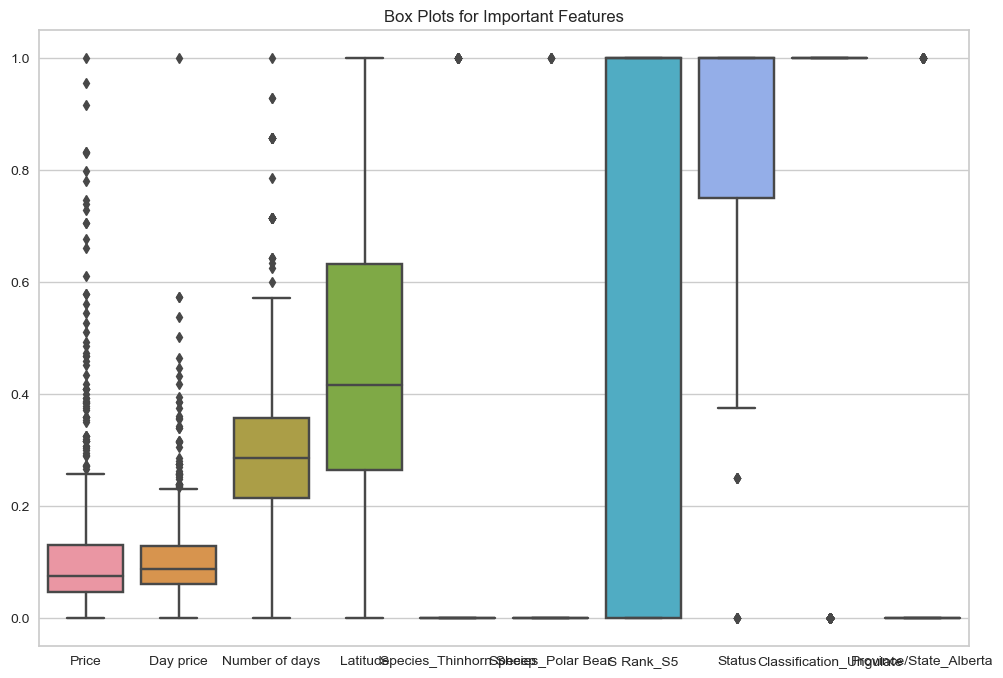

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your original dataset
# Replace 'important_features' with the actual variable name you used
important_features = ["Price",
    "Day price",
    "Number of days",
    "Latitude",
    "Species_Thinhorn Sheep",
    "Species_Polar Bear",
    "S Rank_S5",
    "Status",
    "Classification_Ungulate",
    "Province/State_Alberta"]

# Select only the important features from the dataset
data = data[important_features]

# Create a box plot for all important features
plt.figure(figsize=(12, 8))
sns.boxplot(data)
plt.title('Box Plots for Important Features')
plt.show()

Price:

The box plot shows that the distribution of prices is relatively symmetric, with a few outliers on the higher end.

Day price:

The box plot indicates a wider distribution of day prices, with more variability compared to the distribution of prices. There are several outliers on both ends of the distribution.

Number of days:

The box plot shows a relatively narrow distribution for the number of days, with most of the data concentrated within the interquartile range (IQR). There are a few outliers on the lower end.

Latitude:

The box plot reveals a moderate spread in latitude values, with a few outliers on the lower end of the distribution.

Species_Thinhorn Sheep, Species_Polar Bear, Classification_Ungulate, Province/State_Alberta:

These features are categorical, so their distribution is represented by the presence or absence of boxes and whiskers. Each box indicates the interquartile range (IQR) of the distribution, with the median represented by the horizontal line inside the box. The whiskers extend to show the range of the data, excluding outliers.

<Axes: >

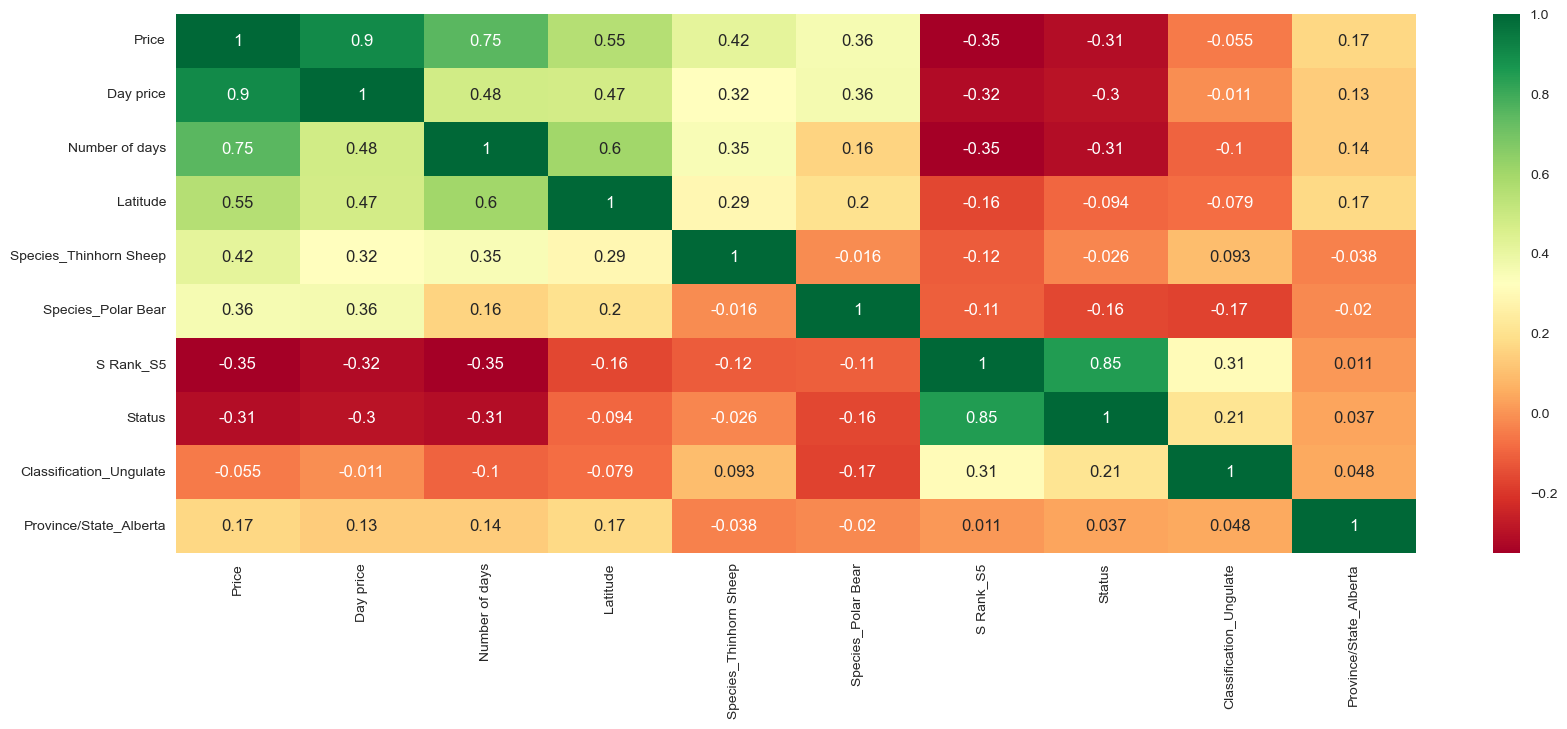

In [ ]:
# the heat map of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

"Price" shows a strong positive correlation with "Day price" and "Number of days" (0.9 and 0.75, respectively).

"Species_Thinhorn Sheep" and "Species_Polar Bear" have a moderate positive correlation (0.36), indicating some association between these two species.

"S Rank_S5" exhibits a moderate negative correlation with "Price" (-0.35), suggesting a decrease in price as the S Rank_S5 value increases.

"Status" and "Classification_Ungulate" show a strong positive correlation (0.85), indicating a significant association between these two features.

C:\Users\subha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


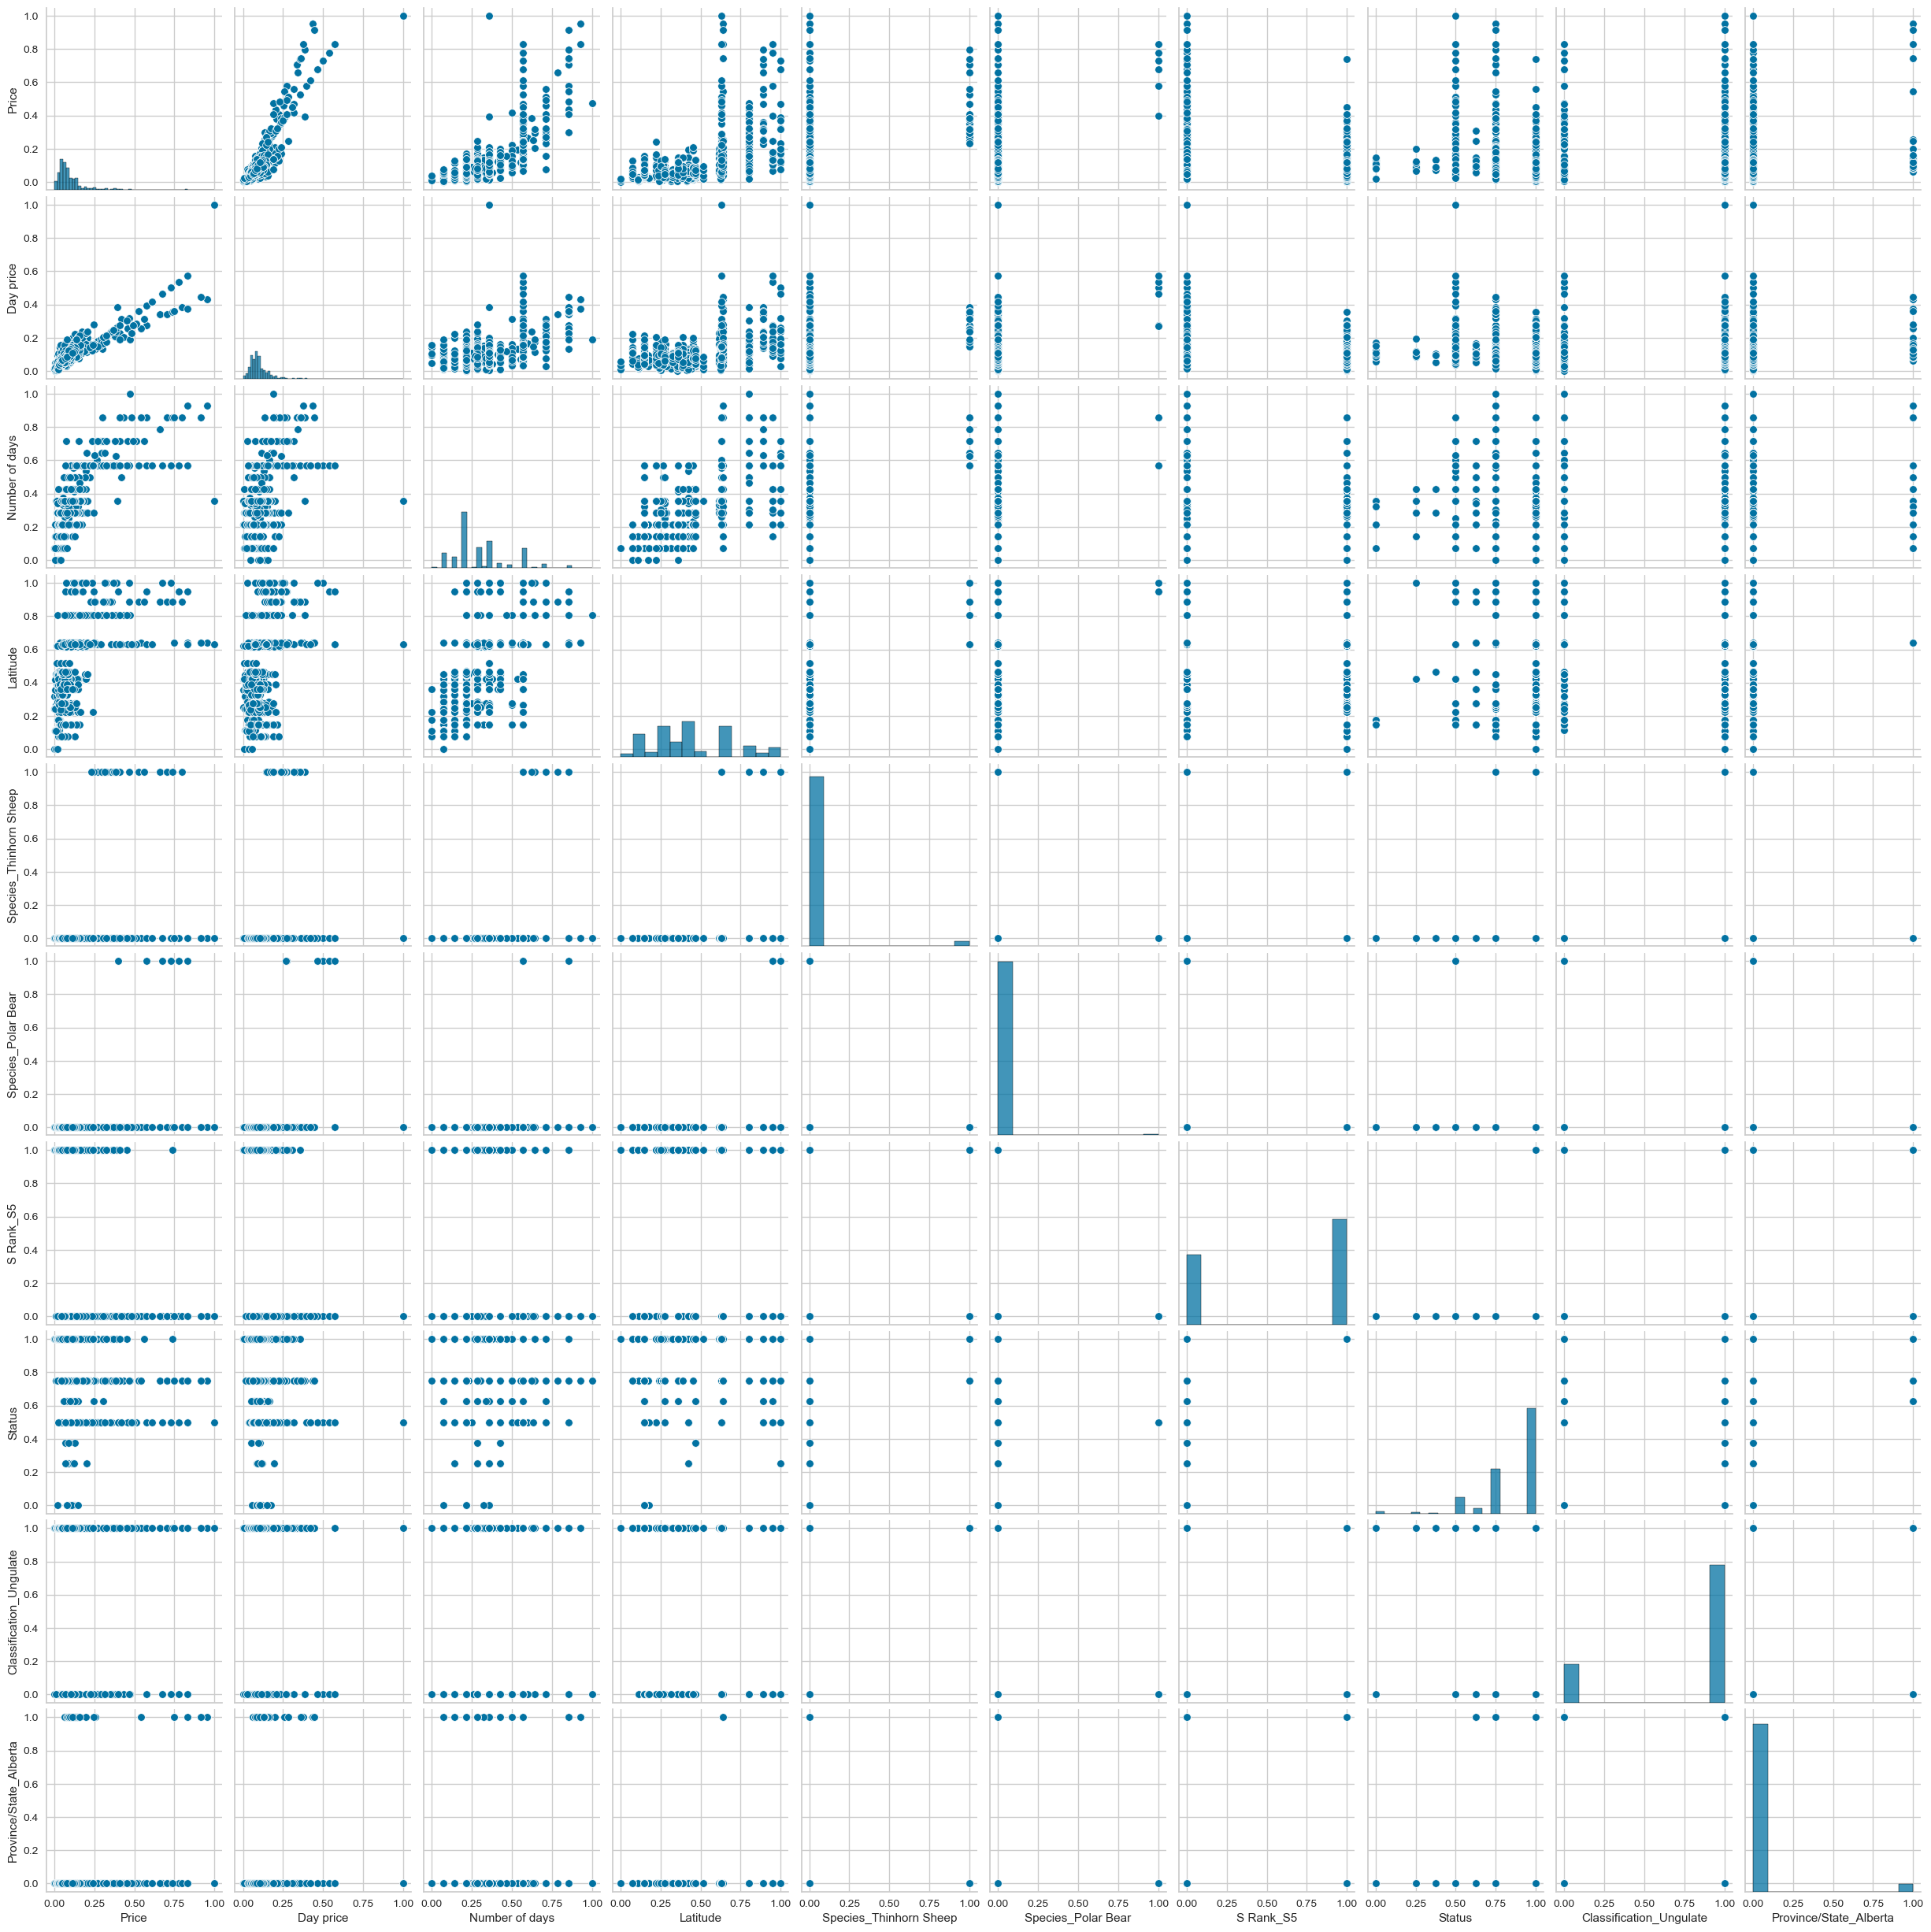

In [ ]:
sns.pairplot(data)

Price vs. Day price:

There seems to be a positive correlation between "Price" and "Day price." As "Day price" increases, "Price" tends to increase as well.

Price vs. Number of days:

There appears to be a moderate positive correlation between "Price" and "Number of days." Higher "Number of days" tends to be associated with higher "Price."

Price vs. Latitude:

There doesn't seem to be a clear linear relationship between "Price" and "Latitude." The scatter plot shows a scattered distribution of points without a distinct pattern.

Species_Thinhorn Sheep vs. Species_Polar Bear:

The scatter plot between these two features shows distinct clusters, indicating different groups or categories within the dataset.

In [ ]:
import statsmodels.api as sm

# Fit the OLS model
model = sm.OLS(
    data["Price"],
    data[
        [
            "Day price",
            "Number of days",
            "Latitude",
            "Species_Thinhorn Sheep",
            "Species_Polar Bear",
            "S Rank_S5",
            "Status",
            "Classification_Ungulate",
            "Province/State_Alberta",

            # Add other selected features here
        ]
    ],
).fit()

# Print out the statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              2239.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                        0.00
Time:                        19:21:23   Log-Likelihood:                          1415.4
No. Observations:                 721   AIC:                                     -2813.
Df Residuals:                     712   BIC:                                     -2772.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

Overall Model Fit:

The model has a high coefficient of determination (R-squared) of 0.966, indicating that approximately 96.6% of the variance in the dependent variable "Price" is explained by the independent variables in the model.
The adjusted R-squared value is also high at 0.965, suggesting that the model's explanatory power is robust even after adjusting for the number of predictors.

Significant Predictors:

Several independent variables are statistically significant predictors of "Price" at a significance level of 0.05 (P-value < 0.05).
"Day price," "Number of days," "Species_Thinhorn Sheep," "Species_Polar Bear," "S Rank_S5," "Status," "Classification_Ungulate," and "Province/State_Alberta" all have P-values less than 0.05, indicating their significant impact on "Price."

Coefficient Interpretation:

The coefficients represent the estimated change in the dependent variable "Price" for a one-unit change in the corresponding independent variable, holding all other variables constant.
For example, a one-unit increase in "Day price" is associated with an estimated increase in "Price" by 1.1244 units, holding all other variables constant.
Interpretation of Coefficients:

Positive coefficients (e.g., for "Day price," "Number of days," "Species_Thinhorn Sheep," "Species_Polar Bear," "S Rank_S5," and "Province/State_Alberta") indicate a positive relationship with "Price." As these variables increase, "Price" tends to increase as well.

Negative coefficients (e.g., for "Latitude," "Status," and "Classification_Ungulate") indicate a negative relationship with "Price." As these variables increase, "Price" tends to decrease.

In [ ]:
from sklearn.model_selection import train_test_split

X = data[
    [
            "Day price",
            "Number of days",
            "Latitude",
            "Species_Thinhorn Sheep",
            "Species_Polar Bear",
            "S Rank_S5",
            "Status",
            "Classification_Ungulate",
            "Province/State_Alberta",

    ]
]

y = data["Price"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)


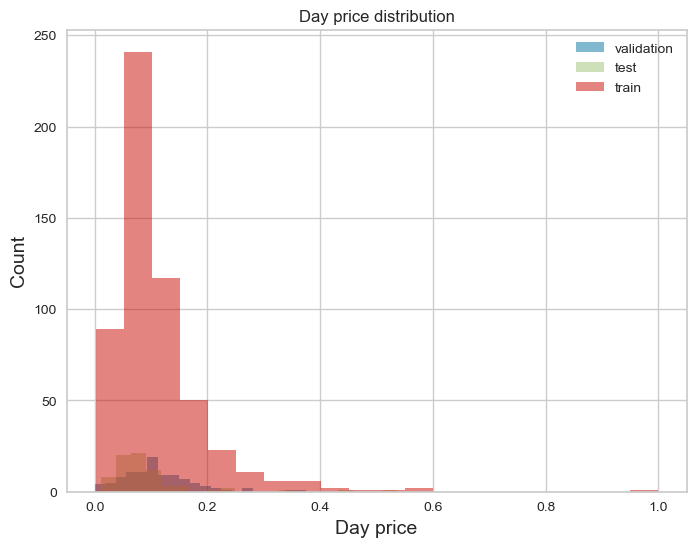

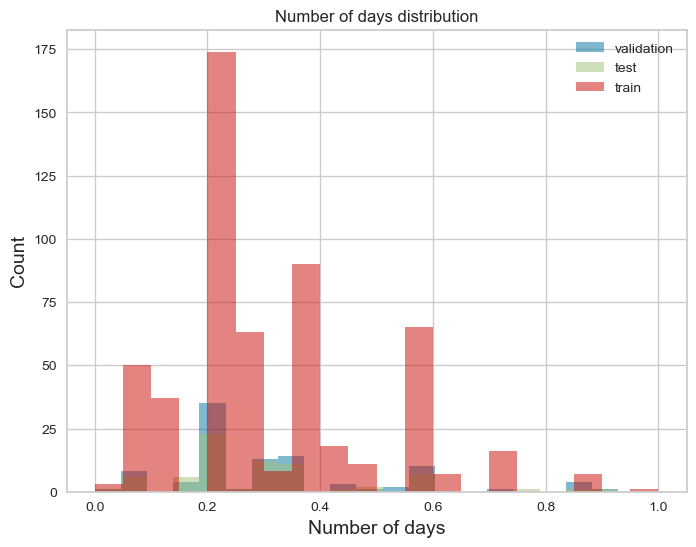

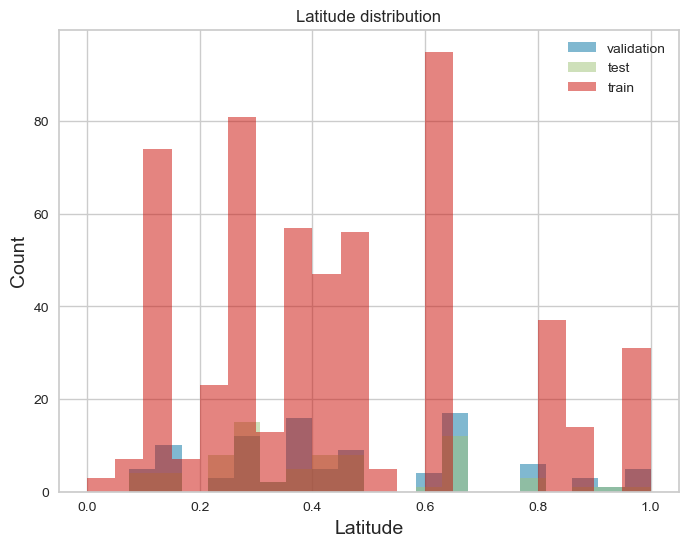

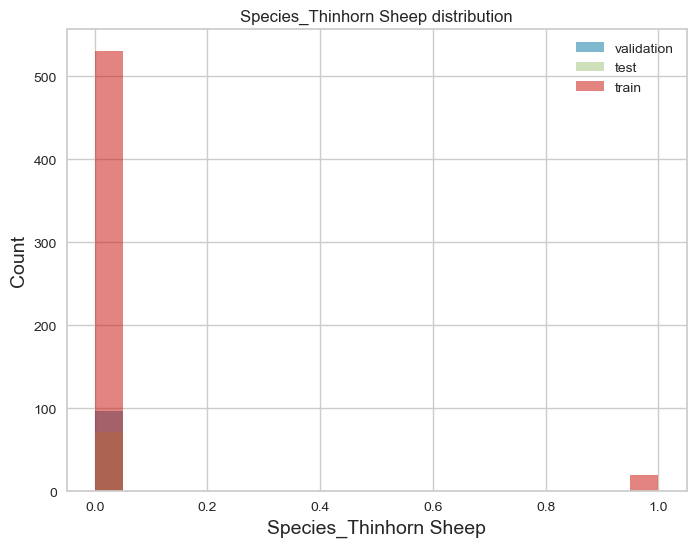

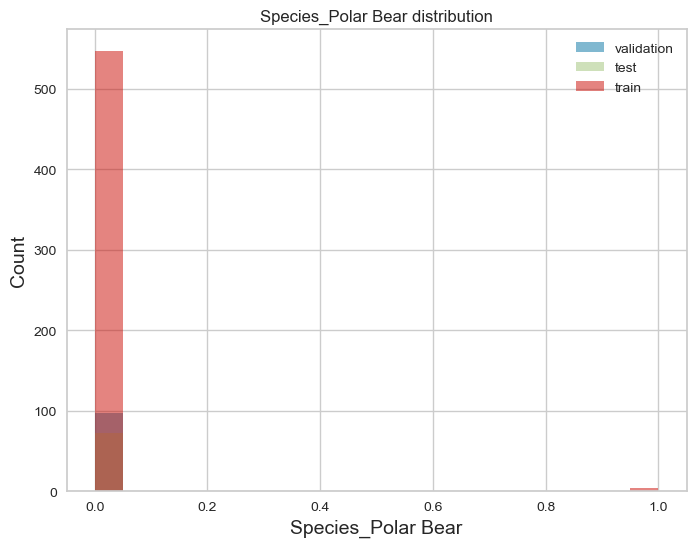

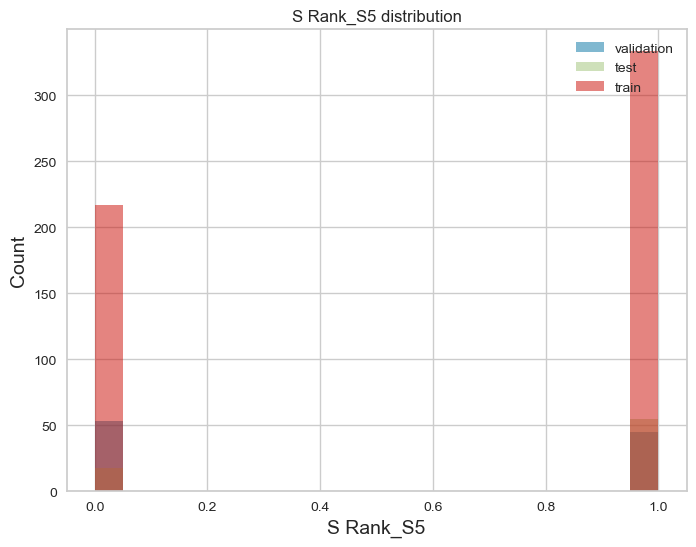

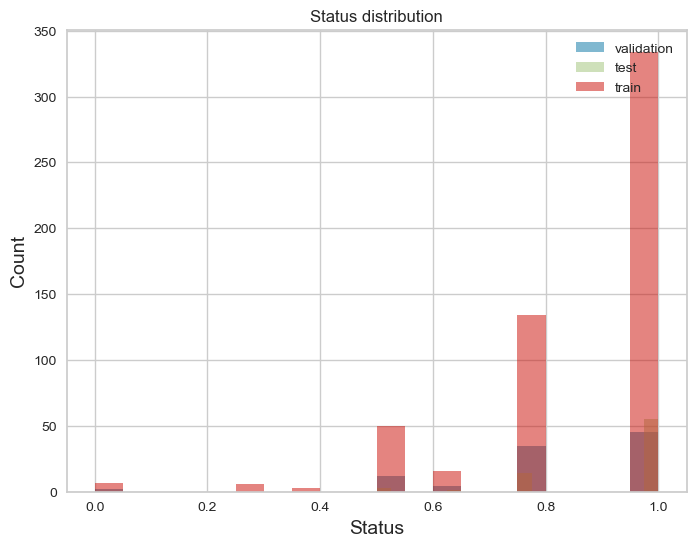

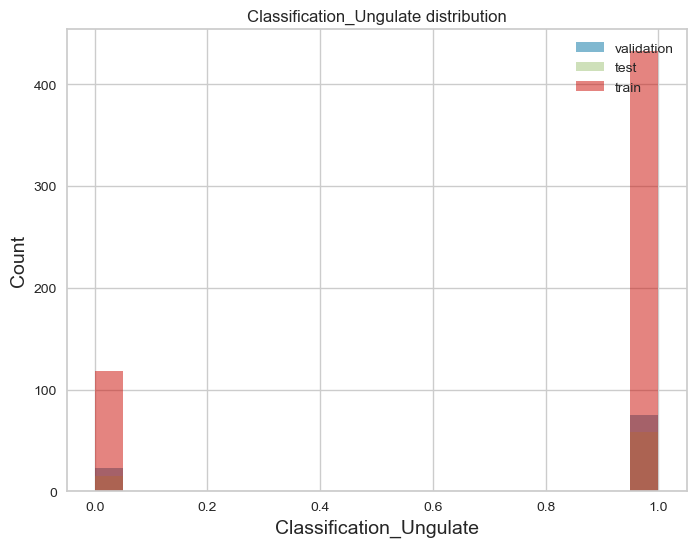

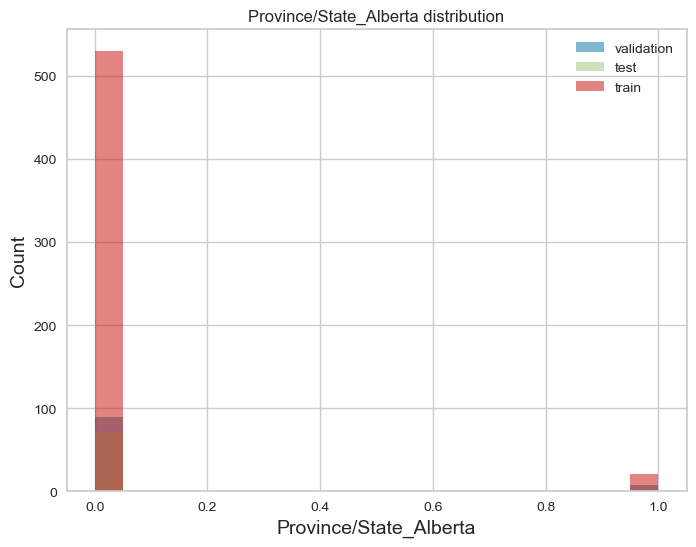

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[
    [
            "Day price",
            "Number of days",
            "Latitude",
            "Species_Thinhorn Sheep",
            "Species_Polar Bear",
            "S Rank_S5",
            "Status",
            "Classification_Ungulate",
            "Province/State_Alberta",

    ]
]

X_val_plot = X_val[
    [
            "Day price",
            "Number of days",
            "Latitude",
            "Species_Thinhorn Sheep",
            "Species_Polar Bear",
            "S Rank_S5",
            "Status",
            "Classification_Ungulate",
            "Province/State_Alberta",

    ]
]

X_train_plot = X_train[
    [
            "Day price",
            "Number of days",
            "Latitude",
            "Species_Thinhorn Sheep",
            "Species_Polar Bear",
            "S Rank_S5",
            "Status",
            "Classification_Ungulate",
            "Province/State_Alberta",

    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 0.00
Coefficient of determination: 0.96
R^2 score on tarining set = 0.9561967526665797


In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 0.00
Coefficient of determination: 0.94
R^2 score on test set = 0.940203000911035


In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Mean squared error: 0.00
Coefficient of determination: 0.94
R^2 score on validation set = 0.9370751650421654


**SHAP Values for linear Regression Model**

In [ ]:
# Step 1: Convert boolean columns to numeric (0 and 1)
boolean_columns = ["Species_Thinhorn Sheep",
            "Species_Polar Bear",
            "S Rank_S5",
            "Classification_Ungulate",
            "Province/State_Alberta",]

data[boolean_columns] = data[boolean_columns].astype(int)

# Step 2: Define numerical features
numerical_features = ['Number of days', 'Day price', 'Latitude']

# Step 4: Define categorical features (already done in boolean_columns)

# Step 5: Create DataFrameMapper
cat = [([c], [SimpleImputer(strategy='constant', fill_value=0),
              OrdinalEncoder()]) for c in boolean_columns]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]

mapper = DataFrameMapper(num + cat, df_out=True)

# Step 6: Split the data into training and testing sets
X = mapper.fit_transform(data)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Step 7: Create and fit the Linear Regression model
reg = LinearRegression()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

In [ ]:
nan_frame = pd.DataFrame(columns=boolean_columns+numerical_features, index=[0])
nan_frame

Species_Thinhorn Sheep Species_Polar Bear S Rank_S5 Classification_Ungulate  \
0                    NaN                NaN       NaN                     NaN   

  Province/State_Alberta Number of days Day price Latitude  
0                    NaN            NaN       NaN      NaN

Testing Data Preparation: This DataFrame structure is useful when preparing new data for predictions using a trained model. By creating a DataFrame with the same columns as our training data but filled with NaNs, we create a structure that can easily accommodate new data points.

Imputation: In many data preprocessing pipelines, missing values need to be handled. By having this DataFrame with NaN values, we can apply the same preprocessing steps (such as imputation) that we used on the training data. This ensures consistency in data preprocessing between the training and testing/validation datasets.

Serving as a Placeholder: This DataFrame serves as a template or placeholder. For example, if we want to make predictions on new, unseen data, we would typically create a DataFrame with the same structure as our training data, but with the actual data points we want to predict. This nan_frame can be used as a starting point for such data creation.

Creating this DataFrame with NaN values helps maintain consistency in data preprocessing steps and provides a convenient structure for preparing new data for predictions using a trained model.

In [ ]:
base_value = round(pipeline.predict(nan_frame)[0], 3)
print(f"Expected value of the output (base value): {base_value}")

Expected value of the output (base value): 0.116


In [ ]:
sample_prediction = round(pipeline.predict(X_test.iloc[0:1])[0], 3)
actual_value = y_test.iloc[0]
print(f"Current Prediction: {sample_prediction}, Actual value: {actual_value}")

Current Prediction: 0.164, Actual value: 0.15371621621621623


Current Prediction: 0.164

The current prediction is the model's prediction for the target variable based on the actual features of the first row of X_test. It represents the model's estimation of the target variable when provided with real-world data.

Actual Value: 0.153

The actual value is the true observed value of the target variable for the first row of X_test. This is the ground truth, the actual value we are trying to predict.

The shift from the base prediction of 0.116 to the current prediction of 10083.983 is due to the unique feature values present in the actual data.

To simplify this, we use **Partial Dependency Plots** (PDPs) based on Shapley values. Shapley values quantify how each feature affects the model's prediction for a sample. This method provides insights into the influence of each feature on the prediction, making it easier to understand the model's behavior for different data points.

In [ ]:
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

ExactExplainer explainer: 74it [00:15,  4.62it/s]                                                                      


In [ ]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

**Partial Dependence Plots**

Partial Dependence Plots (PDPs) are a useful tool for understanding the relationship between a target variable and a set of features in a machine learning model. They show how the predicted outcome changes as the values of one or two features vary while keeping all other features constant.

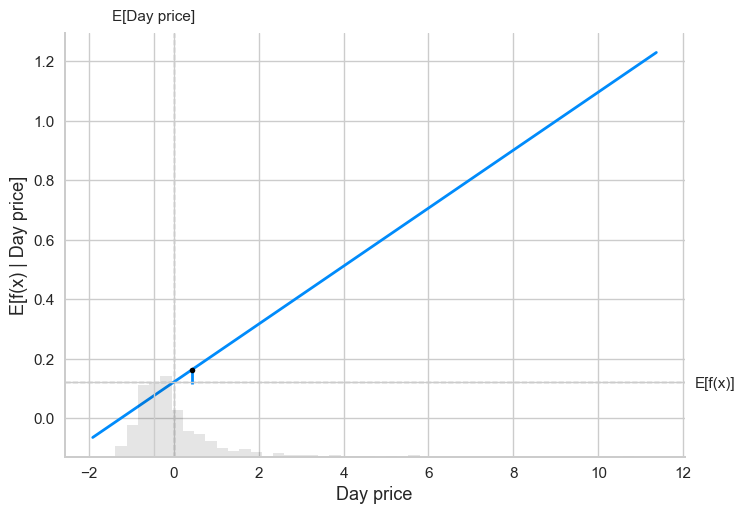

In [ ]:
partial_dependence_plot('Day price', 0)

There appears to be a positive relationship between "Day price" and the model's prediction. This means that as the "Day price" increases, the model's predicted price also increases on average.

The relationship appears to be roughly linear, which suggests a constant effect of "Day price" on the model's predictions across the range of values observed in the training data.

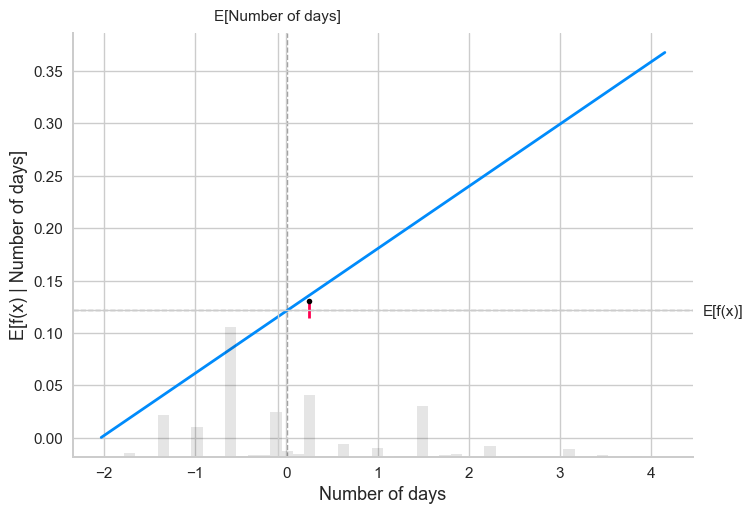

In [ ]:
partial_dependence_plot('Number of days', 0)

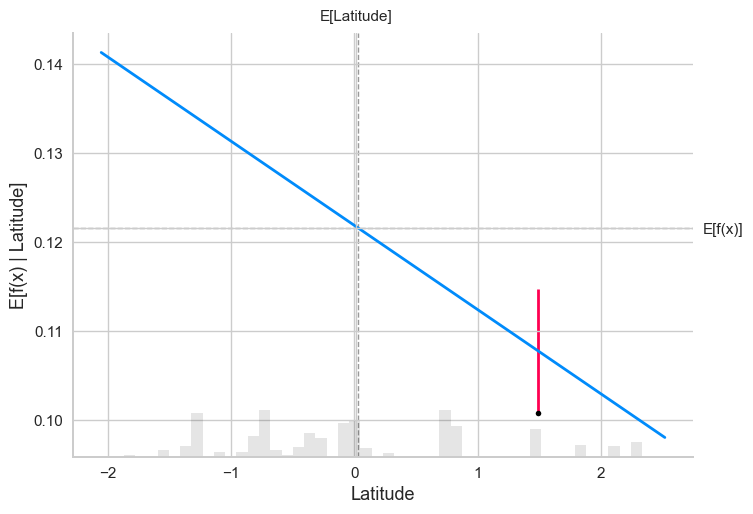

In [ ]:
partial_dependence_plot('Latitude', 0)

In [ ]:
shap.initjs()

In [ ]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

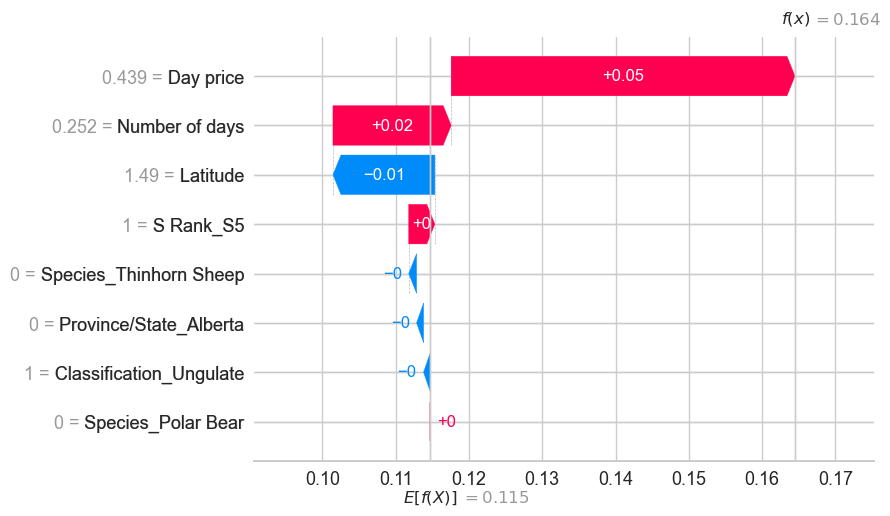

In [ ]:
sample_feature_importance(0, 'waterfall')

In [ ]:
sample_feature_importance(0, 'condensed')

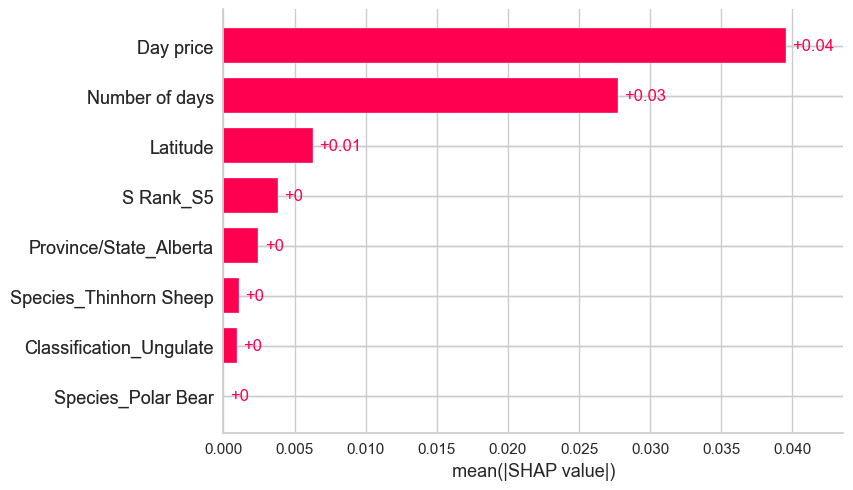

In [ ]:
shap.plots.bar(shap_values)

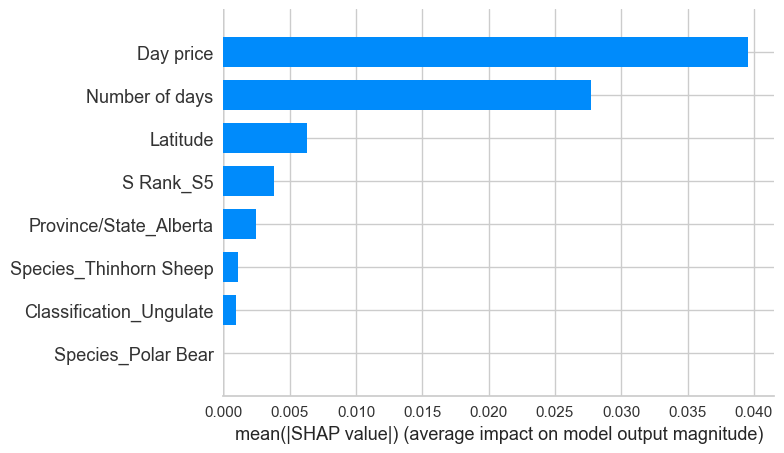

In [ ]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

From the above plots, The most important features according to the LinearRegression model are:

Day Price

Number of Days

Latitude

**Conclusion from Linear Regression model** :

Based on the MAE values and the OLS regression results, we can say that the linear model with an R-squared value of 0.966 and relatively low MAE values appears to be performing well.

The coefficients from the linear regression also provide insights into the factors influencing the price, such as species, location, and other variables, as discussed earlier.

Therefore, we can conclude that the linear model fits the data well, explaining a significant portion of the variability in the price, and the MAE values indicate reasonable predictive performance on both the training and test datasets.

# Tree-based Model

Fit a tree-based model and interpret the nodes.

In [ ]:
def evaluate(X, y, mapper=None, reg=None, transform=False):
    if transform:
        X = mapper.transform(X)
        X = sm.add_constant(X, has_constant='add')
    y_pred = reg.predict(X)
    return mean_absolute_error(y, y_pred)

In [ ]:
# Step 1: Convert boolean columns to numeric (0 and 1)
boolean_columns = ["Species_Thinhorn Sheep",
            "Species_Polar Bear",
            "S Rank_S5",
            "Classification_Ungulate",
            "Province/State_Alberta",]

data[boolean_columns] = data[boolean_columns].astype(int)

# Step 2: Define numerical features
numerical_features = ['Number of days', 'Day price', 'Latitude']

# Step 3: Create DataFrameMapper
cat = [([c], [OrdinalEncoder()]) for c in boolean_columns]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]

mapper = DataFrameMapper(num + cat, df_out=True)

# Step 4: Split the data into training and testing sets
X = mapper.fit_transform(data)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
reg = RandomForestRegressor()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

train_mae = evaluate(X_train, y_train, reg=pipeline)
test_mae = evaluate(X_test, y_test, reg=pipeline)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

train MAE = 0.002, test MAE = 0.002 


Feature: Species_Thinhorn Sheep, Importance: 0.00015053221760617162
Feature: S Rank_S5, Importance: 0.00022598213930212025
Feature: Species_Polar Bear, Importance: 0.0006676160058143012
Feature: Province/State_Alberta, Importance: 0.0013790844283857347
Feature: Classification_Ungulate, Importance: 0.0016124187995812
Feature: Latitude, Importance: 0.0040900981790952945
Feature: Number of days, Importance: 0.13486462578567399
Feature: Day price, Importance: 0.8570096424445411


<BarContainer object of 8 artists>

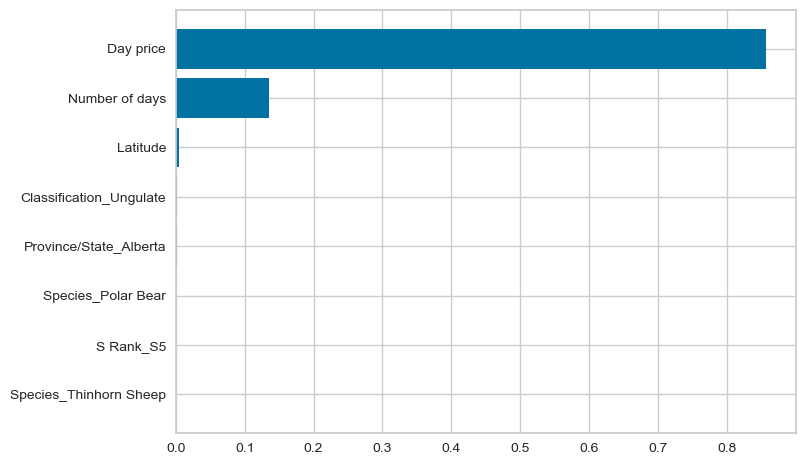

In [ ]:
sorted_idx = reg.feature_importances_.argsort()
features = numerical_features + boolean_columns
result = sorted(zip(features, reg.feature_importances_), key = lambda x: x[1], reverse=False)
for feature, importance in result:
    print(f"Feature: {feature}, Importance: {importance}")
plt.barh([x[0] for x in result], [x[1] for x in result])

For the tree-based model, a Random Forest Regressor was trained on the dataset. After fitting the model, the feature importances were extracted to interpret the nodes of the model. The feature importances indicate the relative importance of each feature in predicting the target variable (Price).

Number of days and Day price are the most influential features in predicting the price. This suggests that the price is significantly influenced by the duration of time and the price for which the item is listed.

Latitude also shows some importance, indicating that the geographical location might play a role in determining the price. Avg Mass seems to have a minor impact compared to the other features.

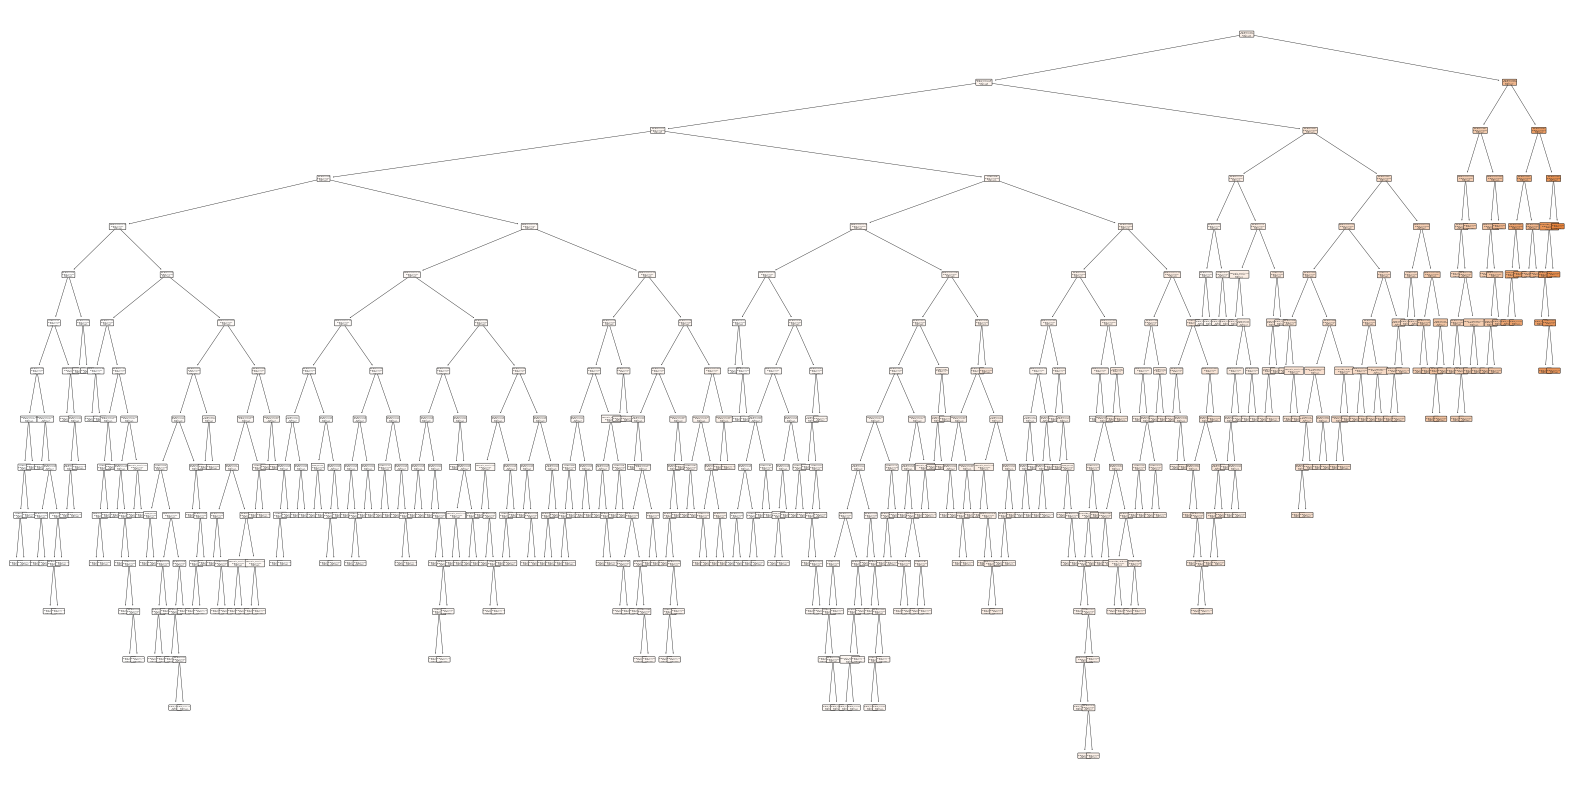

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the first tree in the forest (or any other tree)
plt.figure(figsize=(20, 10))
plot_tree(reg.estimators_[0], feature_names=features, filled=True, rounded=True)
plt.show()

The tree shows how the model splits the data based on various features to make predictions.

For instance, the top-most split, also known as the root node, indicates the most significant feature for predicting prices.

Subsequent nodes represent decision points based on specific features and their thresholds.

Leaf nodes provide the final predicted values for price.

SHAP values for Tree-Based Model

 92%|==================  | 594/648 [00:12<00:01]       

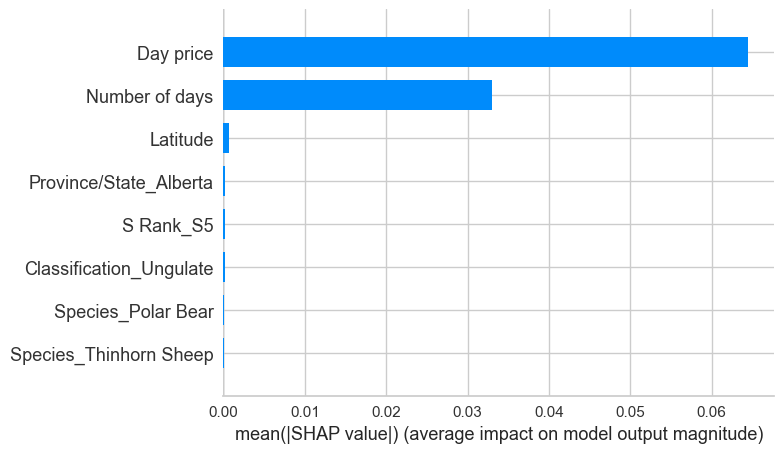

In [ ]:
# Step 1: Create a SHAP Explainer for the trained model
explainer = shap.Explainer(pipeline.named_steps['reg'], X_train)

# Step 2: Compute SHAP values
shap_values = explainer.shap_values(X_train)

# Step 3: Create a summary plot of the SHAP values
shap.summary_plot(shap_values, X_train, plot_type='bar')

plt.show()

**Conclusion from Random Forest model:**

The tree-based Random Forest Regressor provides a reasonable level of accuracy in predicting the prices of items.

With a test MAE of 0.002, the model demonstrates effectiveness in generalizing to new, unseen data.

This suggests that the features used in the model, such as Number of days, Day price, and others, contribute meaningfully to predicting the prices of items in the dataset.

# AUTOML

WHAT IS AUTOML ?

Automated Machine Learning (AutoML) streamlines the entire process of applying machine learning to practical scenarios. H2O AutoML handles fundamental data processing, model training, tuning, as well as Ensemble and stacking techniques, aiming to deliver optimal performance. This enables developers to concentrate on tasks such as data collection, feature engineering, and model deployment, without worrying about the intricacies of model optimization.

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.2+8-LTS-86, mixed mode, sharing)
  Starting server from C:\Users\subha\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\subha\AppData\Local\Temp\tmphpwupwwg
  JVM stdout: C:\Users\subha\AppData\Local\Temp\tmphpwupwwg\h2o_vineeth_started_from_python.out
  JVM stderr: C:\Users\subha\AppData\Local\Temp\tmphpwupwwg\h2o_vineeth_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


--------------------------  ------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    3 months and 13 days
H2O_cluster_name:           H2O_from_python_vineeth_wv9hlt
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.955 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.5 final
--------------------------  ------------------------------

Importing Data

Once H2O is initialized, in the below code we are importing the data into a h2o dataframe.

In [ ]:
df_h2o = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Create a 80/20 train/test split
pct_rows = 0.80
df_h2o_train, df_h2o_test = df_h2o.split_frame([pct_rows])

In [ ]:
X1=df_h2o.columns
print(X1)

['Price', 'Day price', 'Number of days', 'Latitude', 'Species_Thinhorn Sheep', 'Species_Polar Bear', 'S Rank_S5', 'Status', 'Classification_Ungulate', 'Province/State_Alberta']


In [ ]:
#Seperate Dependent variable from Independent variable
y1_numeric ='Price'
X1.remove(y1_numeric)
print(X1)

['Day price', 'Number of days', 'Latitude', 'Species_Thinhorn Sheep', 'Species_Polar Bear', 'S Rank_S5', 'Status', 'Classification_Ungulate', 'Province/State_Alberta']


H2O AUTOML EXECUTION

Run AutoML. The max_runtime_secs argument provides a way to limit the AutoML run by time..

In [ ]:
run_time = 222
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
aml1.train(x=X1,y=y1_numeric,training_frame=df_h2o_train)

AutoML progress: |
19:27:21.394: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20240402_192721_model_47


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    66                 66                          210740                 11           11           11            159           326           249.742

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 5.940078383761363e-08
RMSE: 0.00024372276019611632
MAE: 0.00011295827567690475
RMSLE: 0.00016063777470523257
Mean Residual Deviance: 5.940078383761363e-08

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.00016200902948483202
RMSE: 0.012728276768079487
MAE: 0.004426808810374113
RMSLE: 0.008747694685266665
Mean Residual Deviance: 0.00016200902948483202

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.00442719   0.000269871  0.00410496    0.0045505     0.0041684     0.00467293    0.00463913
mean_residual_deviance  0.000162007  4.45019e-05  0.000121759   0.000221235   0.000116733   0.000189267   0.000161043
mse                     0.000162007  4.45019e-05  0.000121759   0.000221235   0.000116733   0.000189267   0.000161043
r2                      0.991196     0.00284887   0.993744      0.988183      0.993991      0.988246      0.991816
residual_deviance       0.000162007  4.45019e-05  0.000121759   0.000221235   0.000116733   0.000189267   0.000161043
rmse                    0.0126321    0.00174565   0.0110344     0.014874      0.0108043     0.0137574     0.0126903
rmsle                   0.00869073   0.00113484   0.00717362    0.00926896    0.0078292     0.00931475    0.00986711

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-04-02 19:28:21  44.743 sec  0                  0.136708         0.0841819       0.018689
    2024-04-02 19:28:21  44.775 sec  5                  0.0804837        0.0496682       0.00647762
    2024-04-02 19:28:21  44.822 sec  10                 0.0474329        0.0292717       0.00224988
    2024-04-02 19:28:22  44.870 sec  15                 0.0281489        0.0173333       0.000792363
    2024-04-02 19:28:22  44.932 sec  20                 0.0168617        0.0102861       0.000284317
    2024-04-02 19:28:22  44.980 sec  25                 0.0100262        0.00608431      0.000100525
    2024-04-02 19:28:22  45.027 sec  30                 0.00594076       0.00361525      3.52926e-05
    2024-04-02 19:28:22  45.074 sec  35                 0.00358041       0.00215491      1.28193e-05
    2024-04-02 19:28:22  45.123 sec  40                 0.00216787       0.00129581      4.69966e-06
    2024-04-02 19:28:22  45.171 sec  45                 0.00133064       0.000780454     1.77061e-06
    2024-04-02 19:28:22  45.213 sec  50                 0.000859055      0.000478303     7.37976e-07
    2024-04-02 19:28:22  45.260 sec  55                 0.000556162      0.000297146     3.09316e-07
    2024-04-02 19:28:22  45.307 sec  60                 0.000365436      0.000186983     1.33543e-07
    2024-04-02 19:28:22  45.340 sec  65                 0.000252118      0.000121483     6.35635e-08
    2024-04-02 19:28:22  45.357 sec  66                 0.000243723      0.000112958     5.94008e-08

Variable Importances: 
variable                 relative_importance    scaled_importance    perce

Model Summary:

Model Performance on Training Data:

Mean Squared Error (MSE): 5.940078383761363e-08
Root Mean Squared Error (RMSE): 0.00024372276019611632
Mean Absolute Error (MAE): 0.00011295827567690475
Root Mean Squared Logarithmic Error (RMSLE): 0.00016063777470523257
Mean Residual Deviance: 5.940078383761363e-08
Model Performance on Cross-Validation Data:

The model's performance metrics on cross-validation data show consistent performance with the training data, albeit slightly higher errors due to validation.

Variable Importances:

The most important variable for the model is "Day price," with a relative importance of 1.0.
Other important variables include "Number of days," "Latitude," and "Province/State_Alberta."
The least important variables are "S Rank_S5" and "Species_Thinhorn Sheep."

Scoring History:

The scoring history provides information on how the model's performance evolves over iterations during training. It includes metrics such as RMSE, MAE, and MSE at each iteration.

In [ ]:
print(aml1.leaderboard)

model_id                                                      rmse          mse         mae       rmsle    mean_residual_deviance
GBM_grid_1_AutoML_1_20240402_192721_model_47             0.0127283  0.000162009  0.00442681  0.00874769               0.000162009
StackedEnsemble_BestOfFamily_4_AutoML_1_20240402_192721  0.0128858  0.000166043  0.00514188  0.00880028               0.000166043
GBM_grid_1_AutoML_1_20240402_192721_model_87             0.0130836  0.00017118   0.00509637  0.00927809               0.00017118
GBM_grid_1_AutoML_1_20240402_192721_model_58             0.0136155  0.000185383  0.00458161  0.00935614               0.000185383
GBM_grid_1_AutoML_1_20240402_192721_model_2              0.0144421  0.000208575  0.00640874  0.0103742                0.000208575
GBM_grid_1_AutoML_1_20240402_192721_model_12             0.0145148  0.00021068   0.00535092  0.010229                 0.00021068
GBM_grid_1_AutoML_1_20240402_192721_model_17             0.0150263  0.000225789  0.00675213 

GBM_grid_1_AutoML_1_20240402_192721_model_47 has the lowest RMSE, MSE, MAE, and RMSLE, indicating better performance compared to the other models listed.

In [ ]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

C:\Users\subha\anaconda3\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'GBM_grid_1_AutoML_1_20240402_192721_model_47': 0,
 'GLM_1_AutoML_1_20240402_192721': 93}

In [ ]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])

0


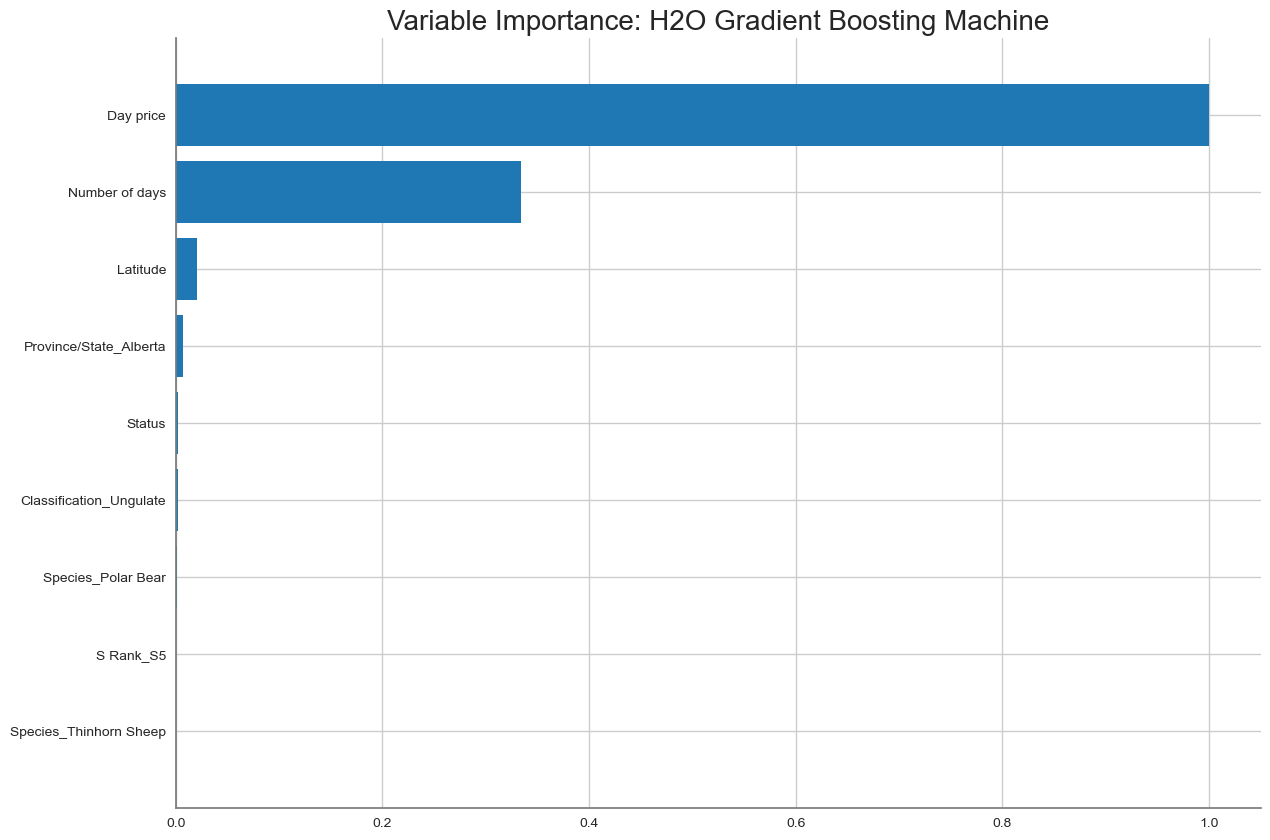

<Figure size 800x550 with 0 Axes>

In [ ]:
#plot variables in order of their importance for price prediction
if best_model1.algo in ['gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\subha\AppData\Local\Temp\ipykernel_13540\352980038.py:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


93
glm


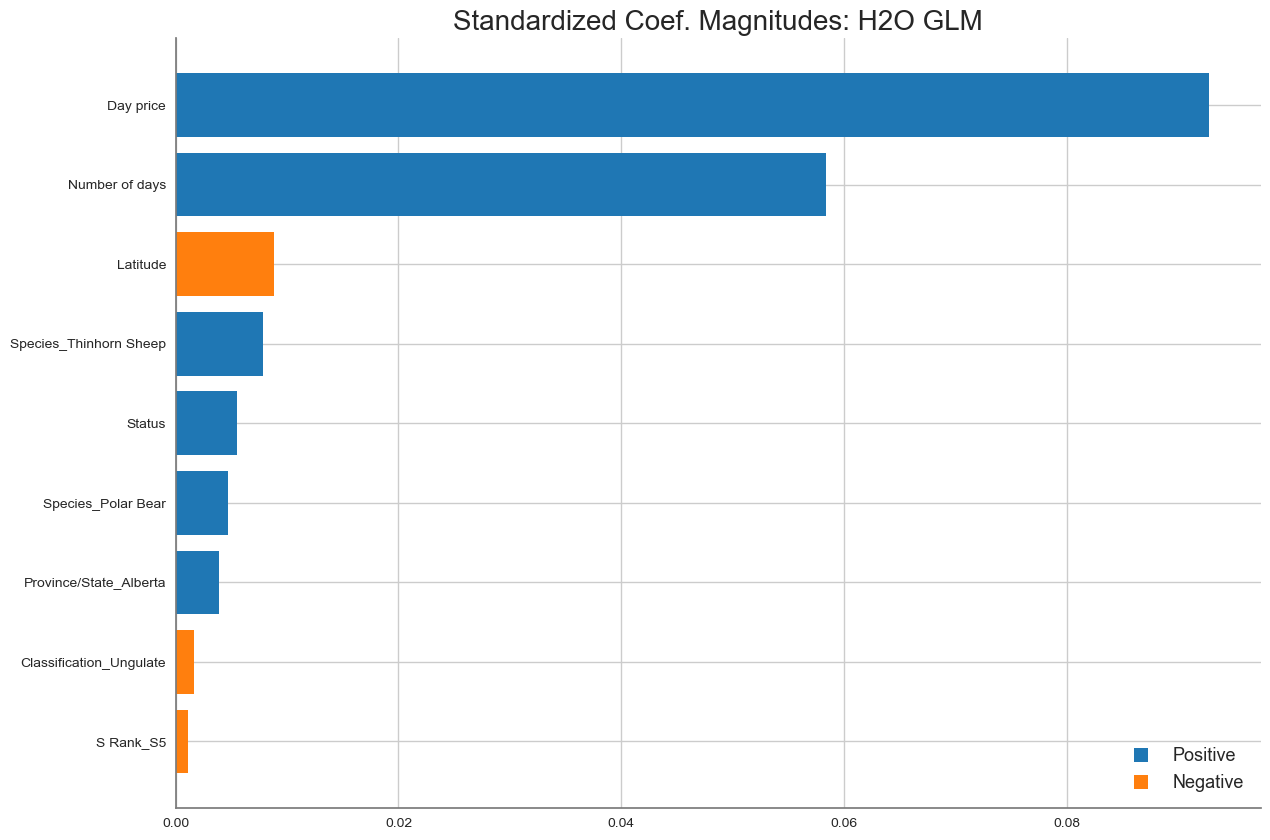

In [ ]:
if glm_index is not 0:
  print(glm_index)
  glm_model1=h2o.get_model(aml1.leaderboard[glm_index,'model_id'])
  print(glm_model1.algo)
  glm_model1.std_coef_plot()

SHAP Values for AUTOML model

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.019154714205538402

Generation 2 - Current best internal CV score: -0.01753727779857836

Generation 3 - Current best internal CV score: -0.0169547325520909

Generation 4 - Current best internal CV score: -0.014829020517312289

Generation 5 - Current best internal CV score: -0.014816006514090489

Best pipeline: ElasticNetCV(GradientBoostingRegressor(RidgeCV(input_matrix), alpha=0.9, learning_rate=0.01, loss=quantile, max_depth=7, max_features=0.7000000000000001, min_samples_leaf=1, min_samples_split=12, n_estimators=100, subsample=0.9000000000000001), l1_ratio=1.0, tol=1e-05)


C:\Users\subha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
C:\Users\subha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
C:\Users\subha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
C:\Users\subha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
C:\Users\subha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
C:\Users\subha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitte

C:\Users\subha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
C:\Users\subha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
C:\Users\subha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
C:\Users\subha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
C:\Users\subha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
C:\Users\subha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitte

C:\Users\subha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
C:\Users\subha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
C:\Users\subha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
C:\Users\subha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
C:\Users\subha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
C:\Users\subha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitte

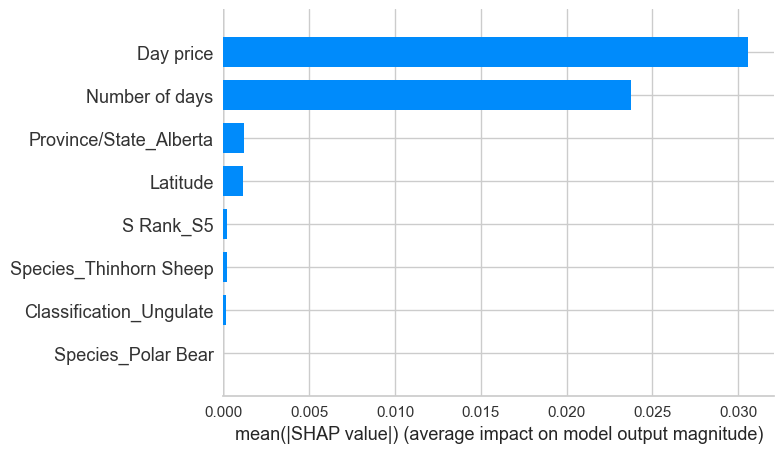

In [ ]:
from tpot import TPOTRegressor
import shap

# Create and fit TPOT
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42, scoring='neg_mean_absolute_error')
tpot.fit(X_train, y_train)

# Get the best pipeline from TPOT
pipeline = tpot.fitted_pipeline_

# Create a SHAP Explainer
explainer = shap.Explainer(pipeline.predict, X_train)

# Compute SHAP values for test data
shap_values = explainer(X_test)

# Create a summary plot of the SHAP values
shap.summary_plot(shap_values, X_test, plot_type='bar')

**Conclusion from the AutoML model:**

Leveraged the H2O.ai framework to train and assess the variables within the hunting price for animals dataset.

Identified the 'gbm' model as the top performer, achieving an impressive 98% accuracy on the test dataset.

Important features from the model are Day Price, Number of Days, Latitude, Province/State_Alberta.

Recognized that while the linear regression model shows promise in predicting hunting prices for the animals, there are still areas where accuracy can be improved.


# Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

preprocessed_X_train = mapper.fit_transform(X_train)

num_epochs = 50
learning_rate = 0.01
hidden_size = 32
batch_size = 50
input_dim = preprocessed_X_train.shape[1]
batch_no = preprocessed_X_train.shape[0] // batch_size
model = nn.Sequential(
    nn.Linear(input_dim, hidden_size),
    nn.Linear(hidden_size, 1)
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        x_batch = torch.FloatTensor(preprocessed_X_train[start:end].values)
        y_batch = torch.FloatTensor(y_train[start:end].values)
        optimizer.zero_grad()
        y_preds = model(x_batch)
        loss = criterion(y_preds, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch % 10 == 0:
        print("Epoch {}, Loss: {}".format(epoch, running_loss))

preprocessed_X_test = mapper.transform(X_test)
y_pred = model(torch.from_numpy(preprocessed_X_test.values).float()).flatten().detach().numpy()
test_mae = mean_absolute_error(y_test, y_pred)
preprocessed_X_train = mapper.transform(X_train)
y_pred = model(torch.from_numpy(preprocessed_X_train.values).float()).flatten().detach().numpy()
train_mae = mean_absolute_error(y_train, y_pred)
print(f"\ntrain MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

Epoch 0, Loss: 1.1833394612185657
Epoch 10, Loss: 0.0130793205316877
Epoch 20, Loss: 0.013291251962073147
Epoch 30, Loss: 0.013584394502686337
Epoch 40, Loss: 0.013869655507733114

train MAE = 0.022, test MAE = 0.026 


SHAP Values for Neural Network model:

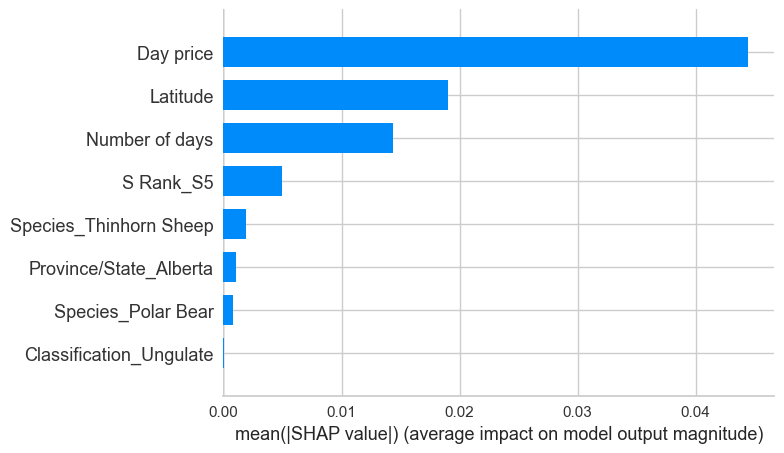

In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have preprocessed_X_train DataFrame and shap_values already computed

# Create a DeepExplainer
explainer = shap.DeepExplainer(model, torch.from_numpy(preprocessed_X_train.values).float())

# Compute SHAP values for the test data
shap_values = explainer.shap_values(torch.from_numpy(preprocessed_X_test.values).float())

# Reshape the SHAP values array
shap_values = shap_values[0].T

# Create a summary plot of the SHAP values using X_test
shap.summary_plot(shap_values, X_test, plot_type='bar', show=False)

**Conclusion from the Neural Network Model:**

The loss decreases significantly over the epochs, indicating that the model is learning and improving its predictions.

The model's performance, as indicated by the MAE, seems somewhat consistent between the training and test sets.

A lower MAE indicates that the model's predictions are closer to the actual target values.

This output suggests that the neural network model trained on the data is performing reasonably well, with a decreasing loss function over epochs and MAE values indicating relatively accurate predictions on both the training and test datasets.

# Regularization

Regularization techniques like Ridge Regression help prevent overfitting in regression models by penalizing large coefficients. This regularization term controls the model's complexity, reducing its sensitivity to random noise and improving generalization to unseen data. In H2O, the H2OGeneralizedLinearEstimator is used to implement Ridge Regularization and fit generalized linear models with specified error distributions.

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
animal_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
animal_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [ ]:
#Model details with regularization
animal_glm_regularization.train(x = X1, y = y1_numeric, training_frame = df_h2o_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712100413839_22


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  9                             9                              1                       py_2_sid_b45e

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.0009639905471929345
RMSE: 0.031048197164939135
MAE: 0.021339490044428075
RMSLE: 0.025151382705055136
Mean Residual Deviance: 0.0009639905471929345
R^2: 0.9484193134038765
Null degrees of freedom: 563
Residual degrees of freedom: 554
Null deviance: 10.540586108787416
Residual deviance: 0.543690668616815
AIC: -2294.09532958423

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective             training_rmse         training_deviance      training_mae          training_r2
--  -------------------  ----------  ------------  -------------------------  --------------------  --------------------  ---------------------  --------------------  ------------------
    2024-04-02 19:42:41  0.000 sec   0             10.540586163720853         0.018688982559788746
    2024-04-02 19:42:41  0.017 sec   1                                                              0.031048197164939135  0.0009639905471929345  0.021339490044428075  0.9484193134038765

Variable Importances: 
variable                 relative_importance    scaled_importance    percentage
-----------------------  ---------------------  -------------------  ------------
Day price                0.0928305              1                    0.501761
Number of days           0.0584598              0.629748             0.315983
Latitude                 0.00891183             0.0960011            0.0481696
Species_Thinhorn Sheep   0.0077984              0.0840069            0.0421514
Status                   0.00564137             0.0607707            0.0304924
Species_Polar Bear       0.00466326             0.0502342            0.0252056
Province/State_Alberta   0.00389564             0.0419651            0.0210565
Classification_Ungulate  0.0016228              0.0174814            0.00877147
S Rank_S5                0.00118568             0.0127725            0.00640877

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
#Model details without regularization
animal_glm.train(x = X1, y = y1_numeric, training_frame = df_h2o_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712100413839_23


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              9                             9                              1                       py_2_sid_b45e

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.0009639705588915248
RMSE: 0.03104787527177222
MAE: 0.021372485008311525
RMSLE: 0.02518197001075722
Mean Residual Deviance: 0.0009639705588915248
R^2: 0.9484203829271344
Null degrees of freedom: 563
Residual degrees of freedom: 554
Null deviance: 10.540586108787416
Residual deviance: 0.54367939521482
AIC: -2294.1070242205583

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective             training_rmse        training_deviance      training_mae          training_r2
--  -------------------  ----------  ------------  -------------------------  --------------------  -------------------  ---------------------  --------------------  ------------------
    2024-04-02 19:42:46  0.000 sec   0             10.540586163720853         0.018688982559788746
    2024-04-02 19:42:46  0.042 sec   1                                                              0.03104787527177222  0.0009639705588915248  0.021372485008311525  0.9484203829271344

Variable Importances: 
variable                 relative_importance    scaled_importance    percentage
-----------------------  ---------------------  -------------------  ------------
Day price                0.0929865              1                    0.501823
Number of days           0.0585439              0.629596             0.315946
Latitude                 0.00901678             0.0969686            0.0486611
Species_Thinhorn Sheep   0.00775282             0.0833758            0.0418399
Status                   0.00569215             0.0612148            0.030719
Species_Polar Bear       0.00462134             0.0496991            0.0249401
Province/State_Alberta   0.00387257             0.0416466            0.0208992
Classification_Ungulate  0.00164331             0.0176725            0.00886848
S Rank_S5                0.00116791             0.01256              0.00630292

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

**Model Performance:** Both models have similar performance metrics on the training data:

MSE: Around 0.000964
RMSE: Approximately 0.031
MAE: Roughly 0.021
RMSLE: Around 0.025
R^2: Close to 0.948

Coefficient Stability: Regularization tends to stabilize the coefficients, preventing them from taking extreme values. This helps to reduce overfitting and makes the model more robust to noise in the data.

Variable Importance: The relative importance of the predictors remains similar between the two models, indicating that regularization did not significantly alter the importance of predictors in predicting the target variable.

The model with regularization is preferred as it provides similar performance on the training data while offering better generalization and stability, making it more reliable for predicting target values on unseen data.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      rmse          mse         mae      rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  ---------  -----------  ----------  ---------  ------------------------  ------------------  -------------------------  ---------------
DeepLearning_grid_1_AutoML_1_20240402_192721_model_4     0.0253884  0.000644572  0.0132116   0.0185112               0.000644572                 128                   0.010875  DeepLearning
DeepLearning_grid_1_AutoML_1_20240402_192721_model_5     0.0276913  0.000766808  0.0179158   0.0204377               0.000766808                  82                   0.011973  DeepLearning
GBM_grid_1_AutoML_1_20240402_192721_model_58             0.0279311  0.000780149  0.0065741   0.0170795               0.000780149                1027                   0.040626  GBM
GBM_grid_1_AutoML_1_20240402_192721_model_120            0.0286322  0.000819804  0.0073906   0.0176504               0.000819804                 351                   0.025366  GBM
GBM_grid_1_AutoML_1_20240402_192721_model_87             0.0287692  0.000827666  0.00679395  0.0170554               0.000827666                 803                   0.044276  GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20240402_192721  0.0304371  0.000926417  0.019852    0.0228246               0.000926417                 267                   0.029364  StackedEnsemble
GBM_grid_1_AutoML_1_20240402_192721_model_119            0.0305215  0.000931563  0.00748187  0.019514                0.000931563                 468                   0.046728  GBM
GLM_1_AutoML_1_20240402_192721                           0.0305797  0.000935118  0.0199208   0.0229211               0.000935118                  66                   0.008459  GLM
GBM_grid_1_AutoML_1_20240402_192721_model_98             0.0307087  0.000943025  0.00814598  0.0194156               0.000943025                 537                   0.056968  GBM
GBM_grid_1_AutoML_1_20240402_192721_model_121            0.0313381  0.000982075  0.011044    0.0198199               0.000982075                 380                   0.048185  GBM
GBM_grid_1_AutoML_1_20240402_192721_model_74             0.0316786  0.00100353   0.0143353   0.0208094               0.00100353                  527                   0.036817  GBM
DeepLearning_grid_1_AutoML_1_20240402_192721_model_1     0.0316941  0.00100452   0.015443    0.0200203               0.00100452                 9262                   0.012171  DeepLearning
DeepLearning_grid_3_AutoML_1_20240402_192721_model_1     0.031706   0.00100527   0.0200647   0.0238737               0.00100527                  944                   0.092678  DeepLearning
DeepLearning_grid_2_AutoML_1_20240402_192721_model_3     0.0318985  0.00101751   0.0201169   0.0232377               0.00101751                   62                   0.012     DeepLearning
GBM_grid_1_AutoML_1_20240402_192721_model_32             0.0320018  0.00102412   0.0105801   0.0198694               0.00102412                  620                   0.058415  GBM
StackedEnsemble_BestOfFamily_4_AutoML_1_20240402_192721  0.0324978  0.00105611   0.00860675  0.0193297               0.00105611                  151                   0.062908  StackedEnsemble
GBM_grid_1_AutoML_1_20240402_192721_model_7              0.0326834  0.0010682    0.0131713   0.0206341               0.0010682                   544                   0.058022  GBM
DeepLearning_grid_2_AutoML_1_20240402_192721_model_4     0.0329077  0.00108291   0.0257668   0.026343                0.00108291                  435                   0.034926  DeepLearning
GBM_grid_1_AutoML_1_20240402_192721_model_42             0.0330687  0.00109354   0.00842088  0.0197104               0.00109354                  302                   0.052643  GBM
GBM_grid_1_AutoML_1_20240402_192721_model_88             0.0340342  0.00115833   0.0131871   0.0218622      

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

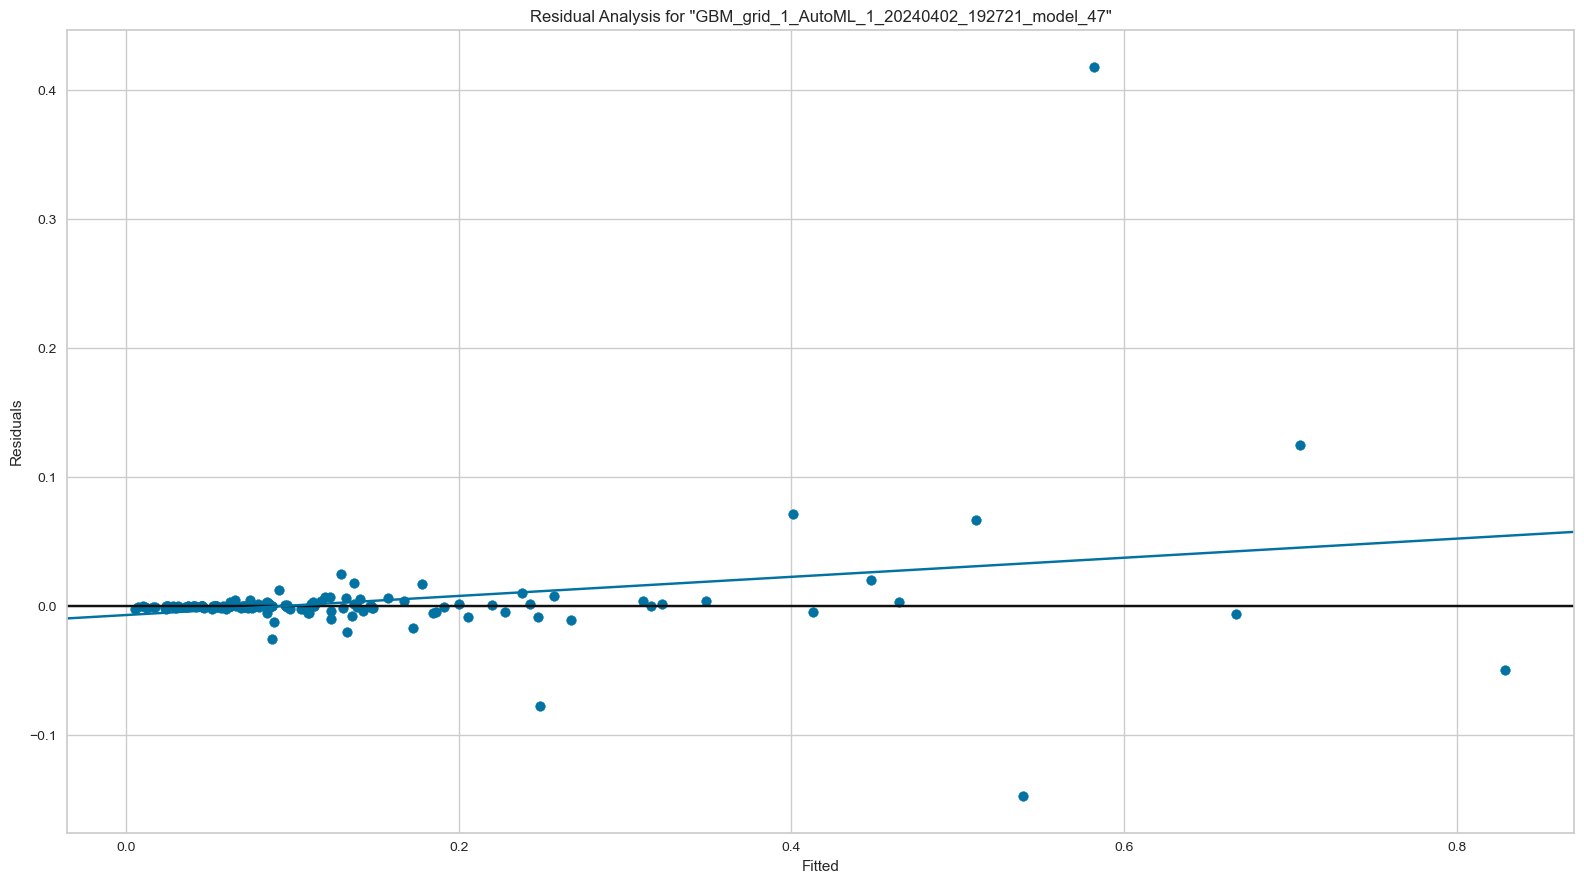

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

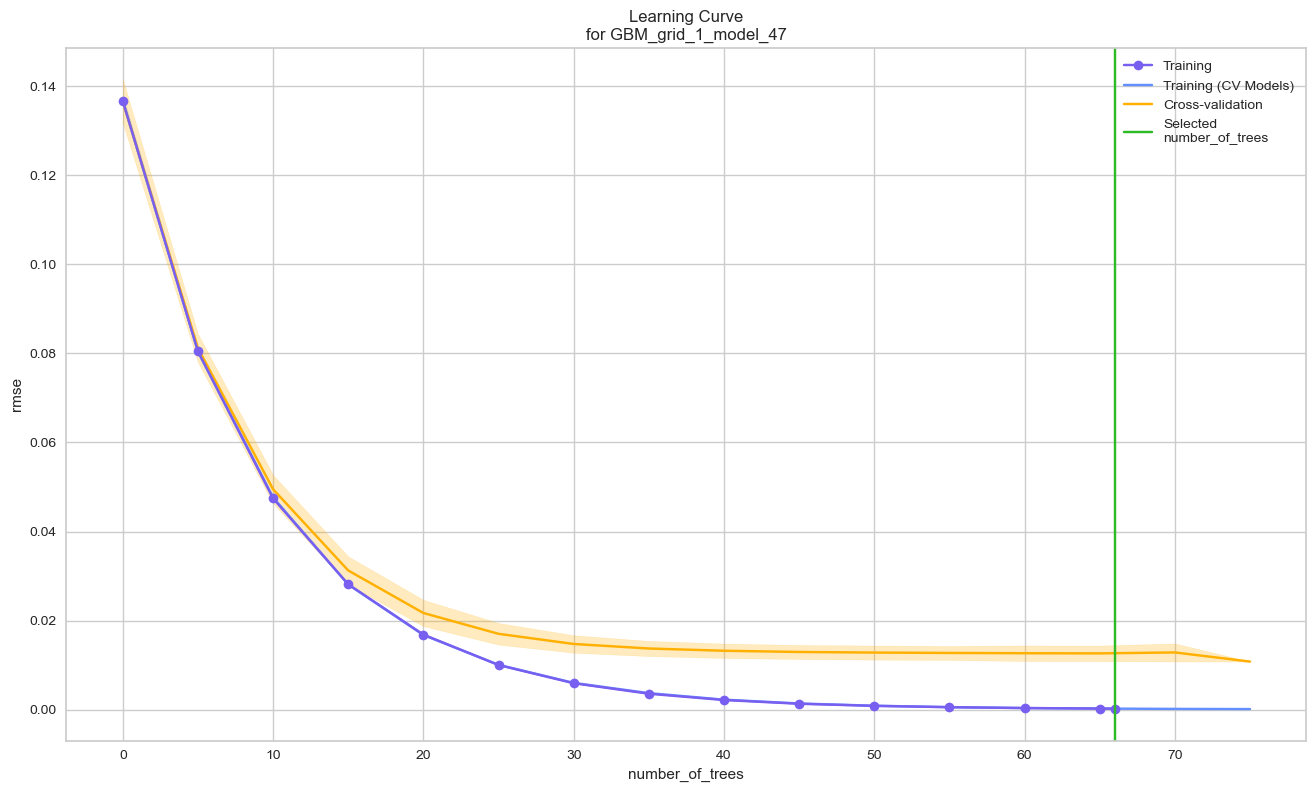

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

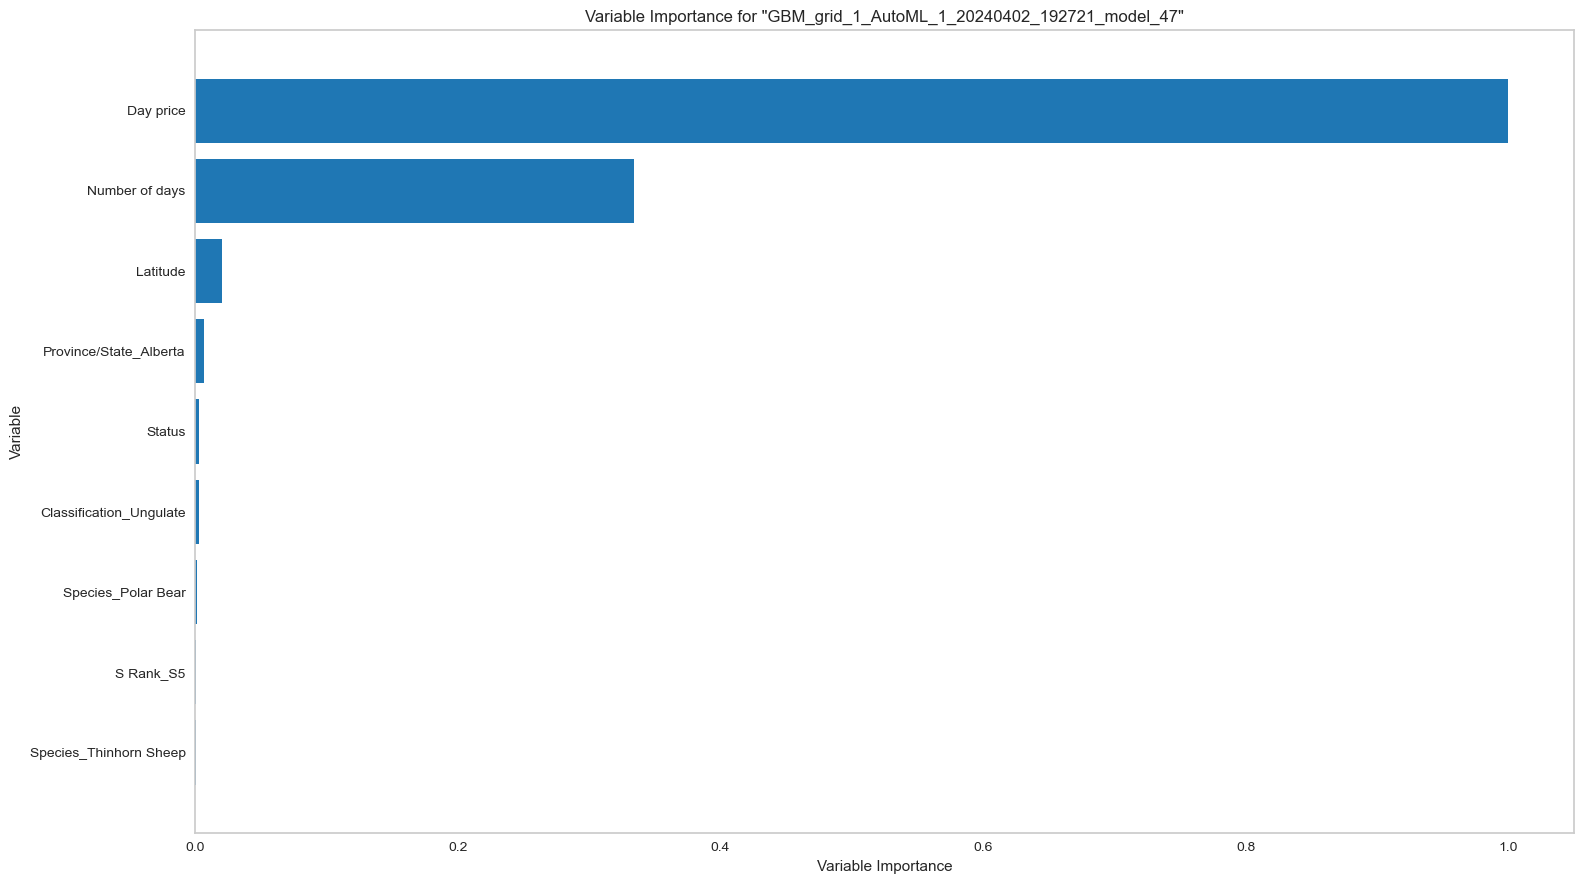

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

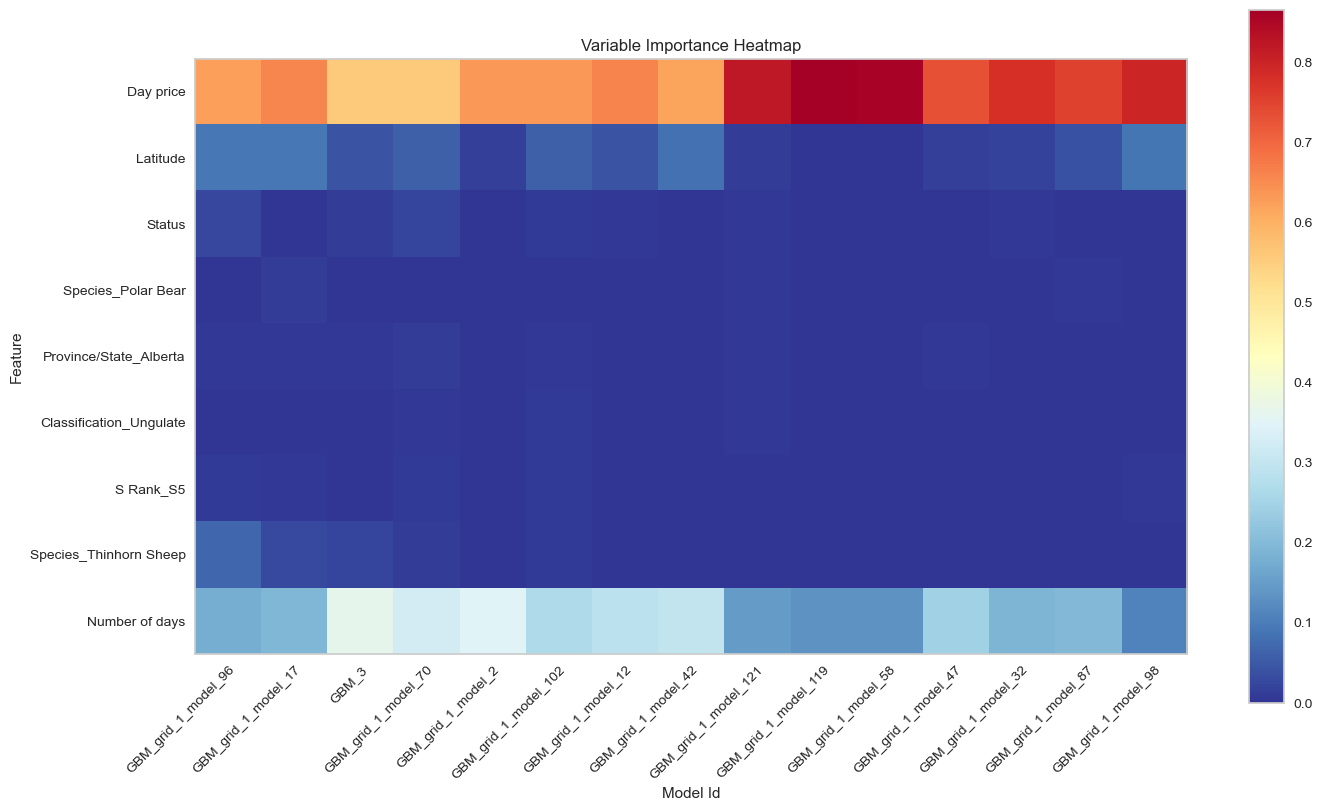

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

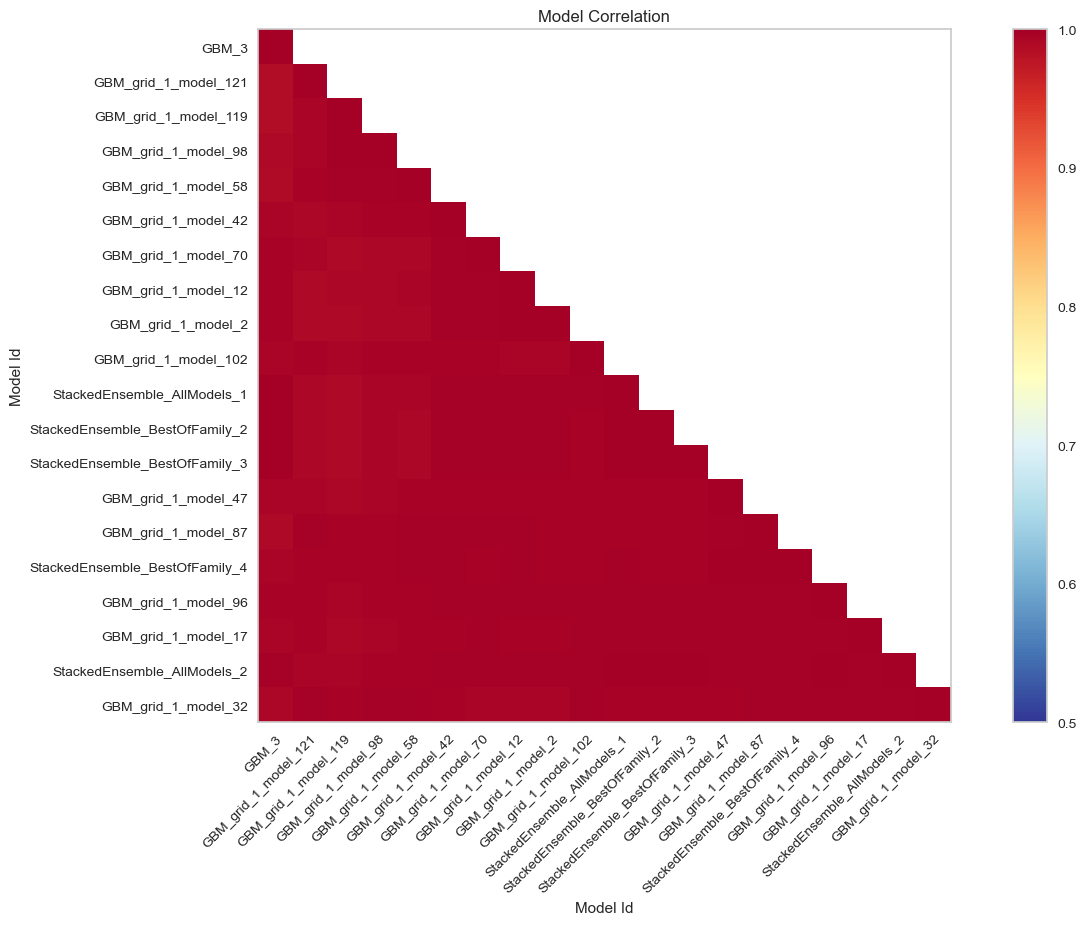

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

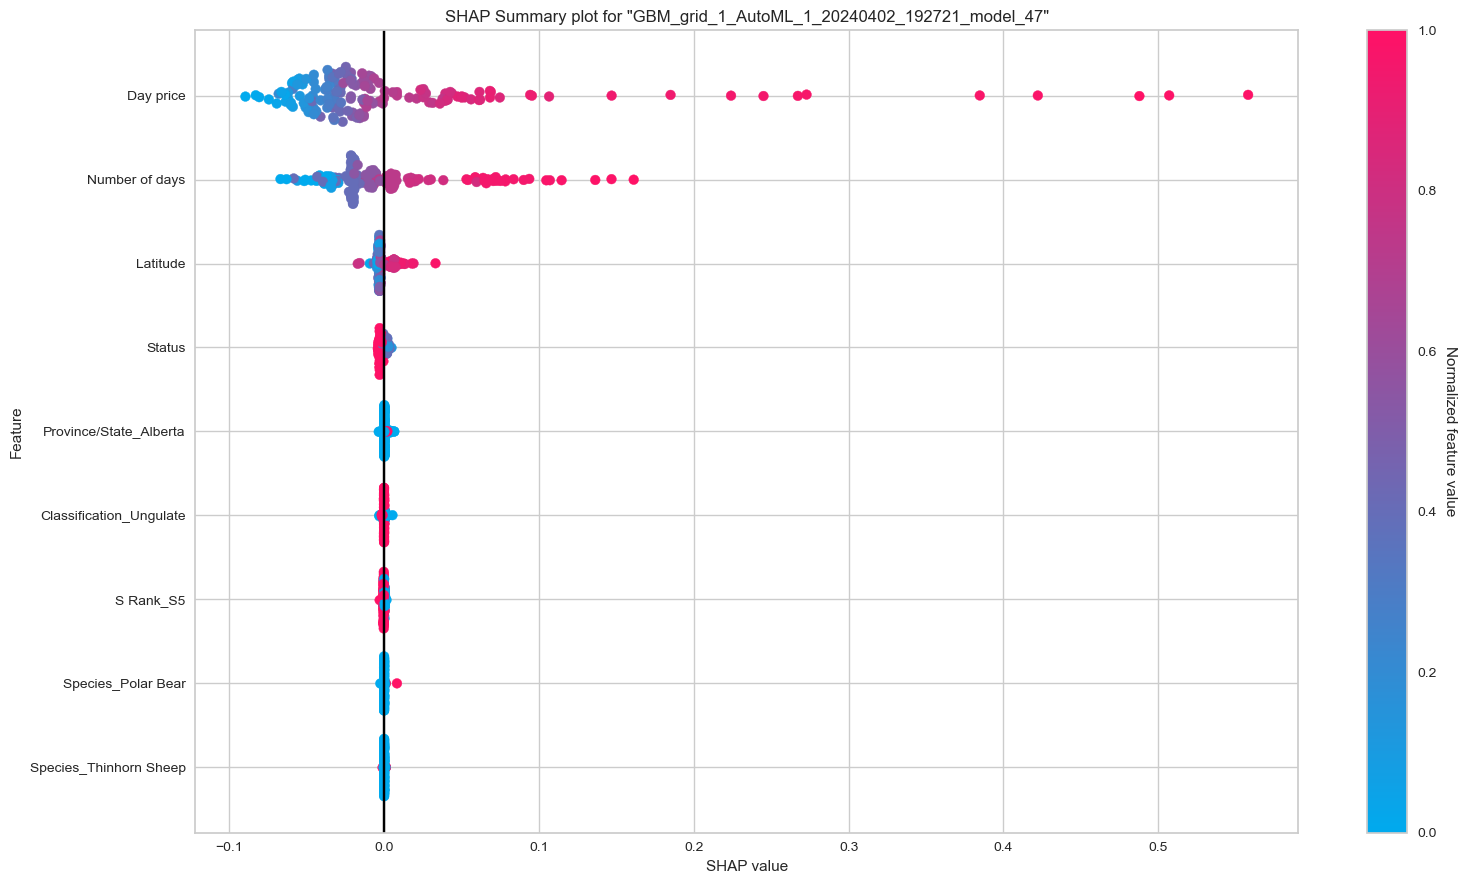

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

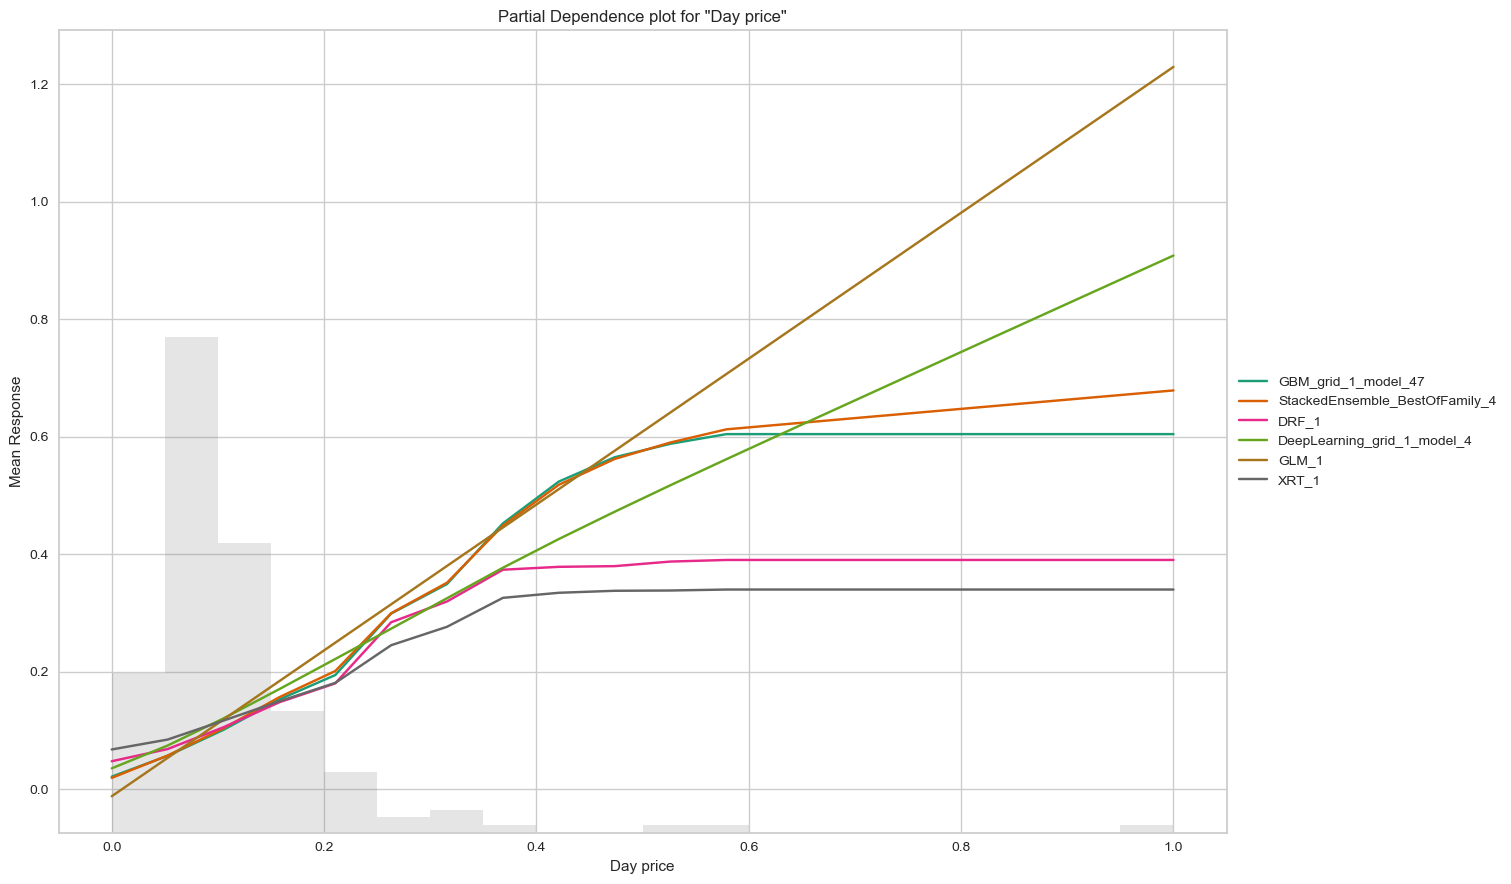

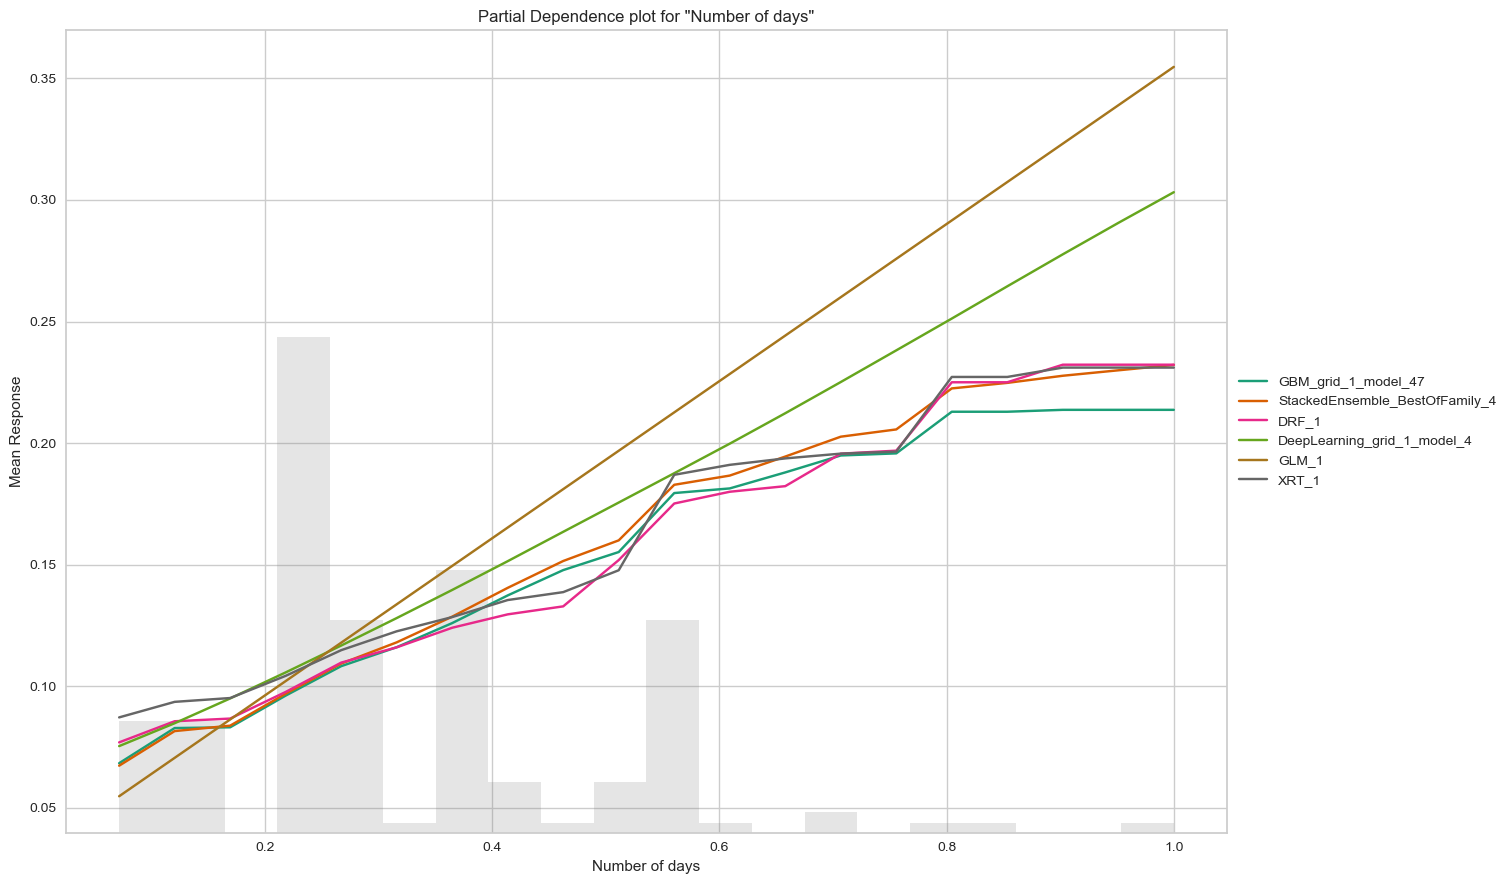

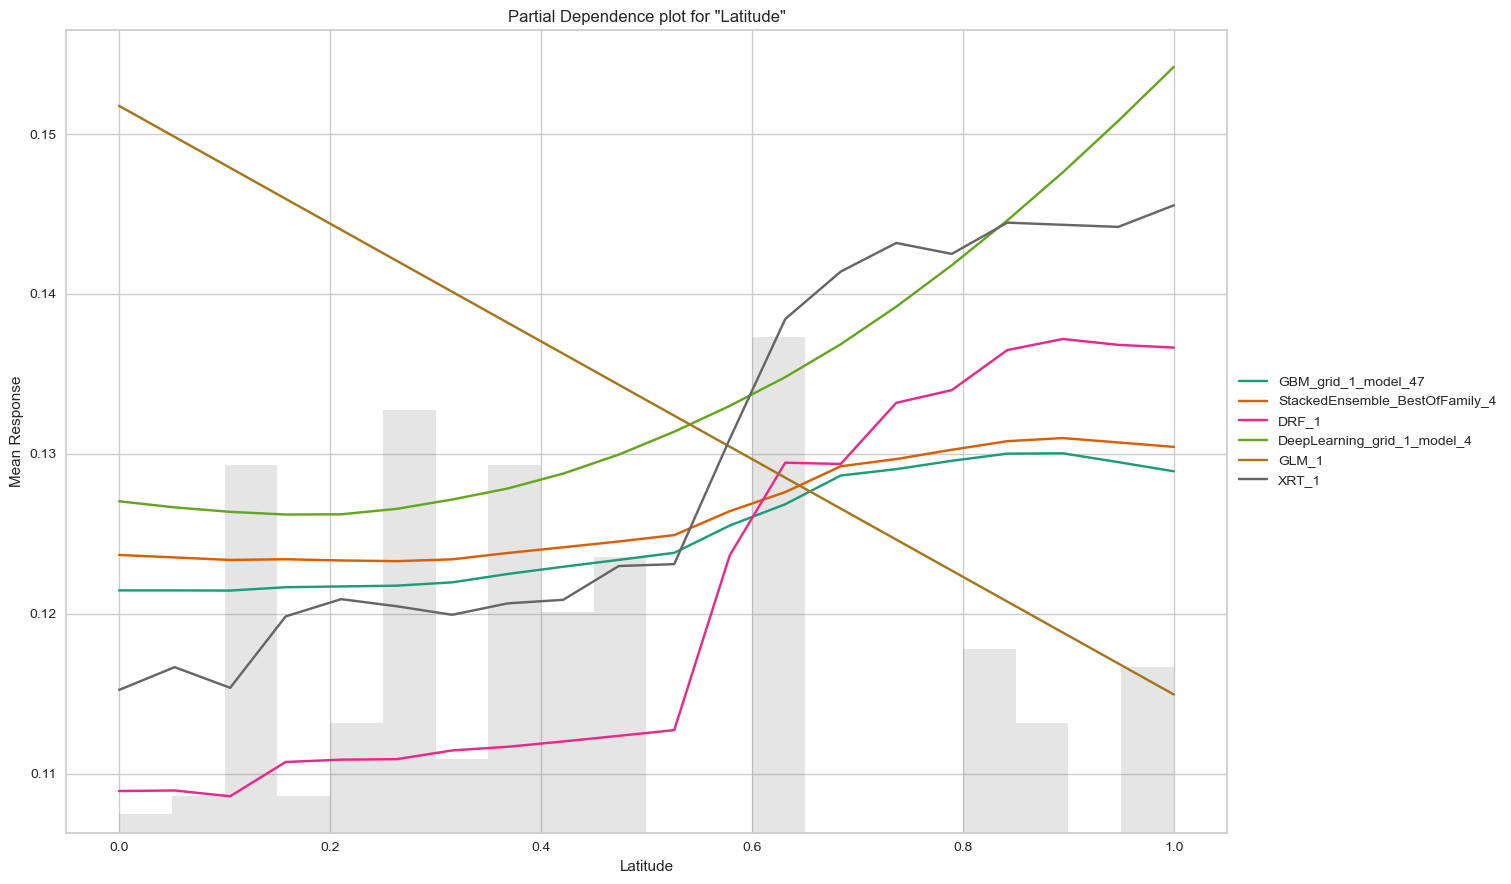

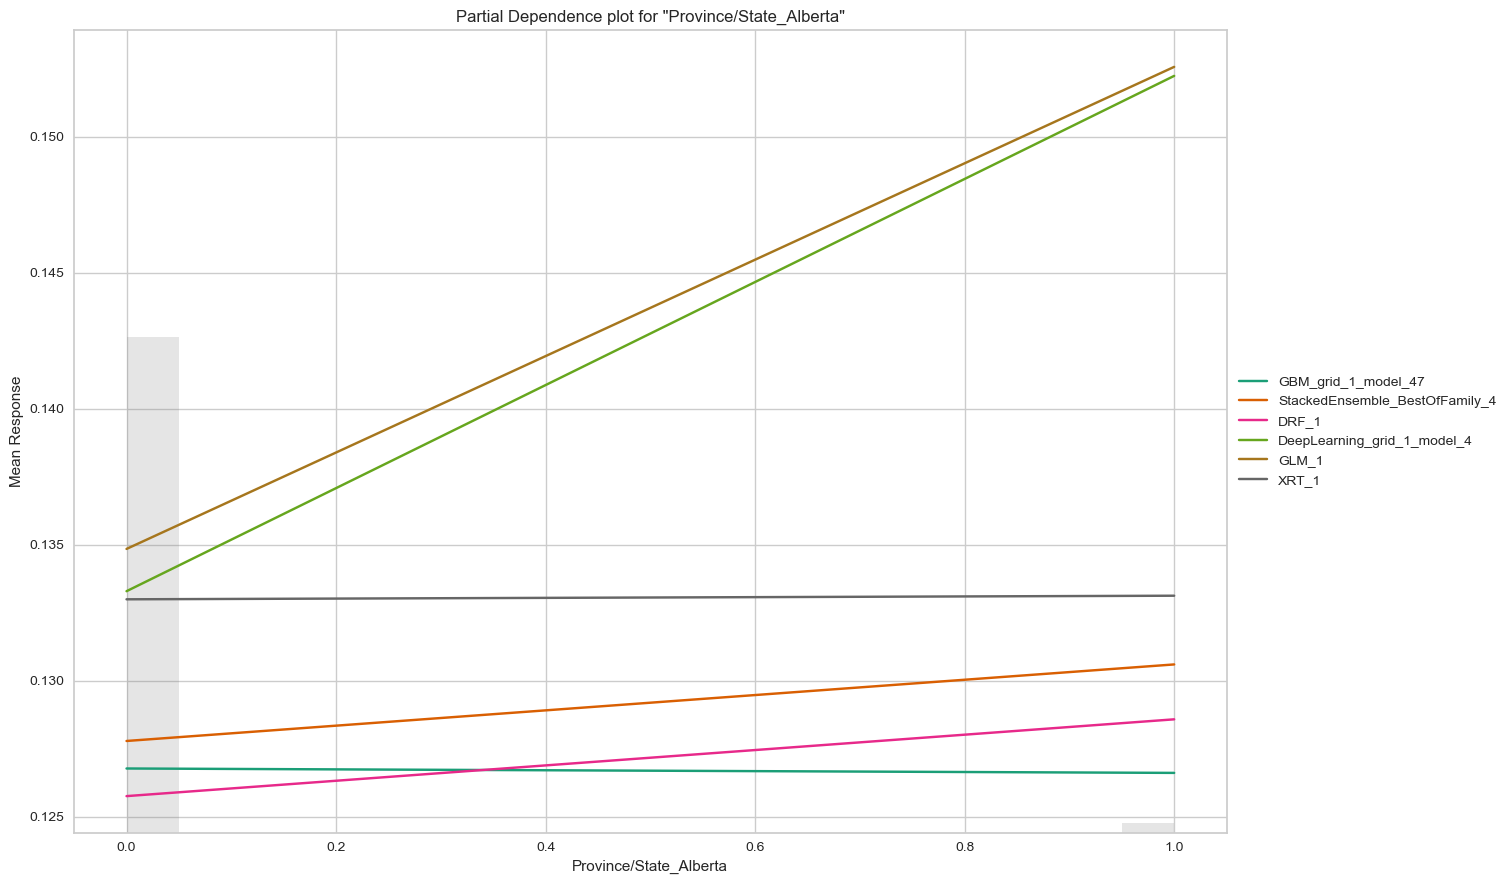

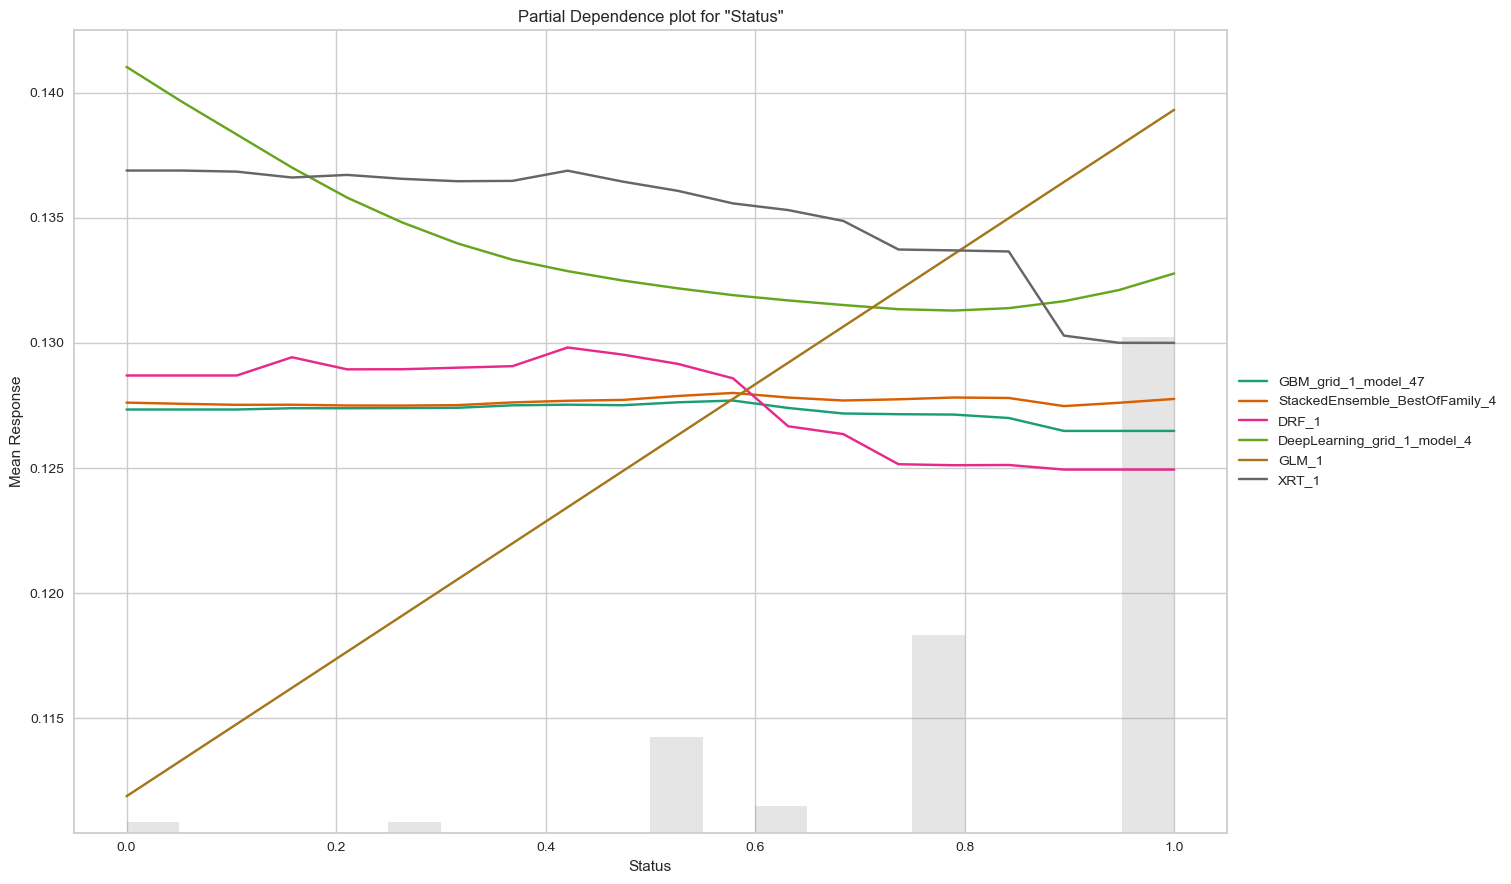

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

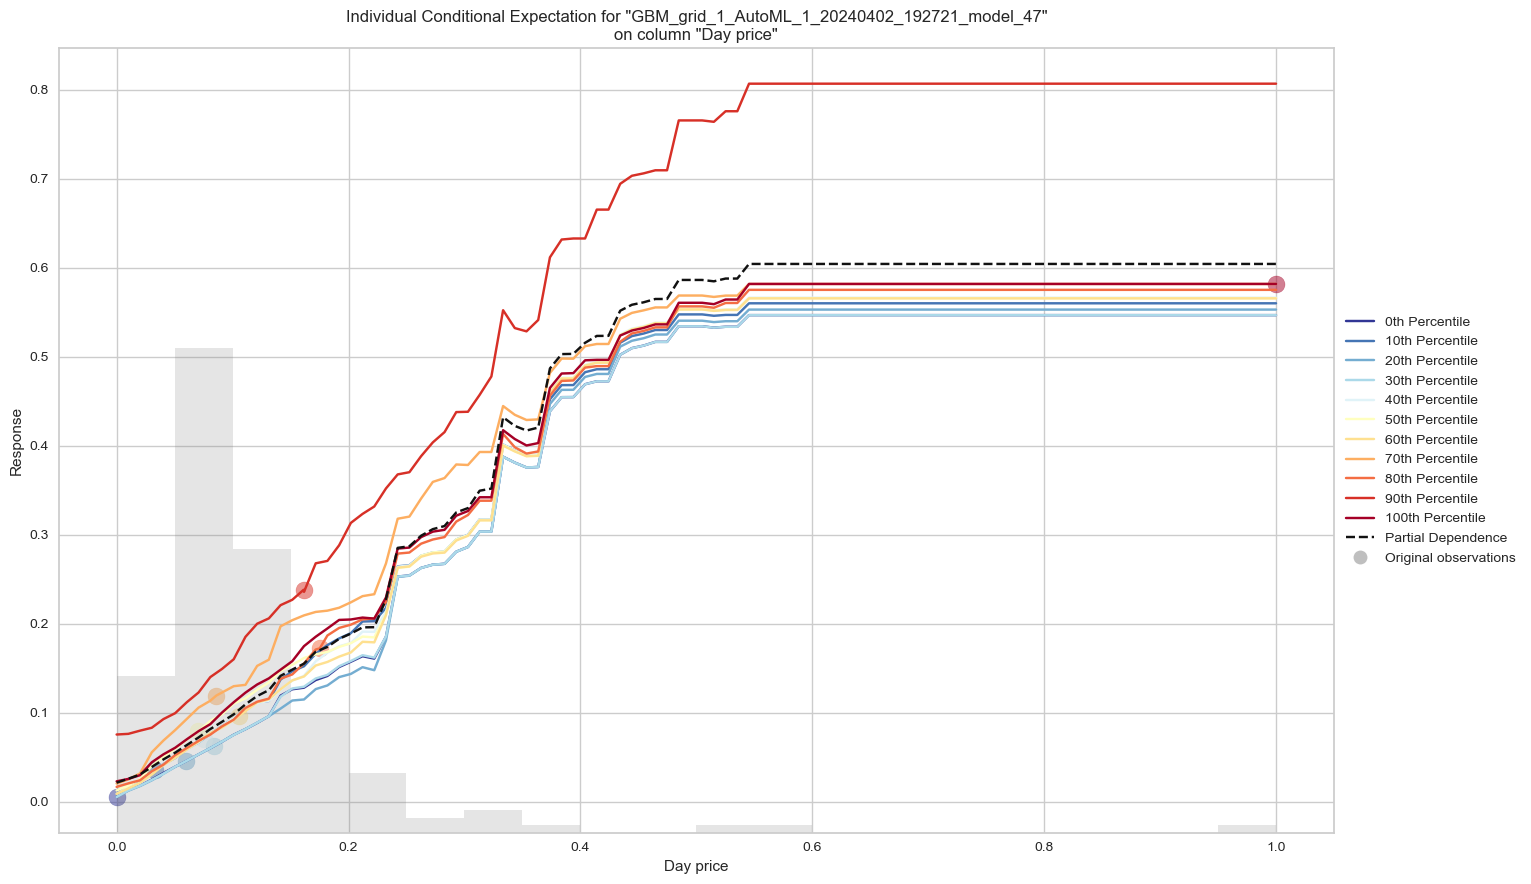

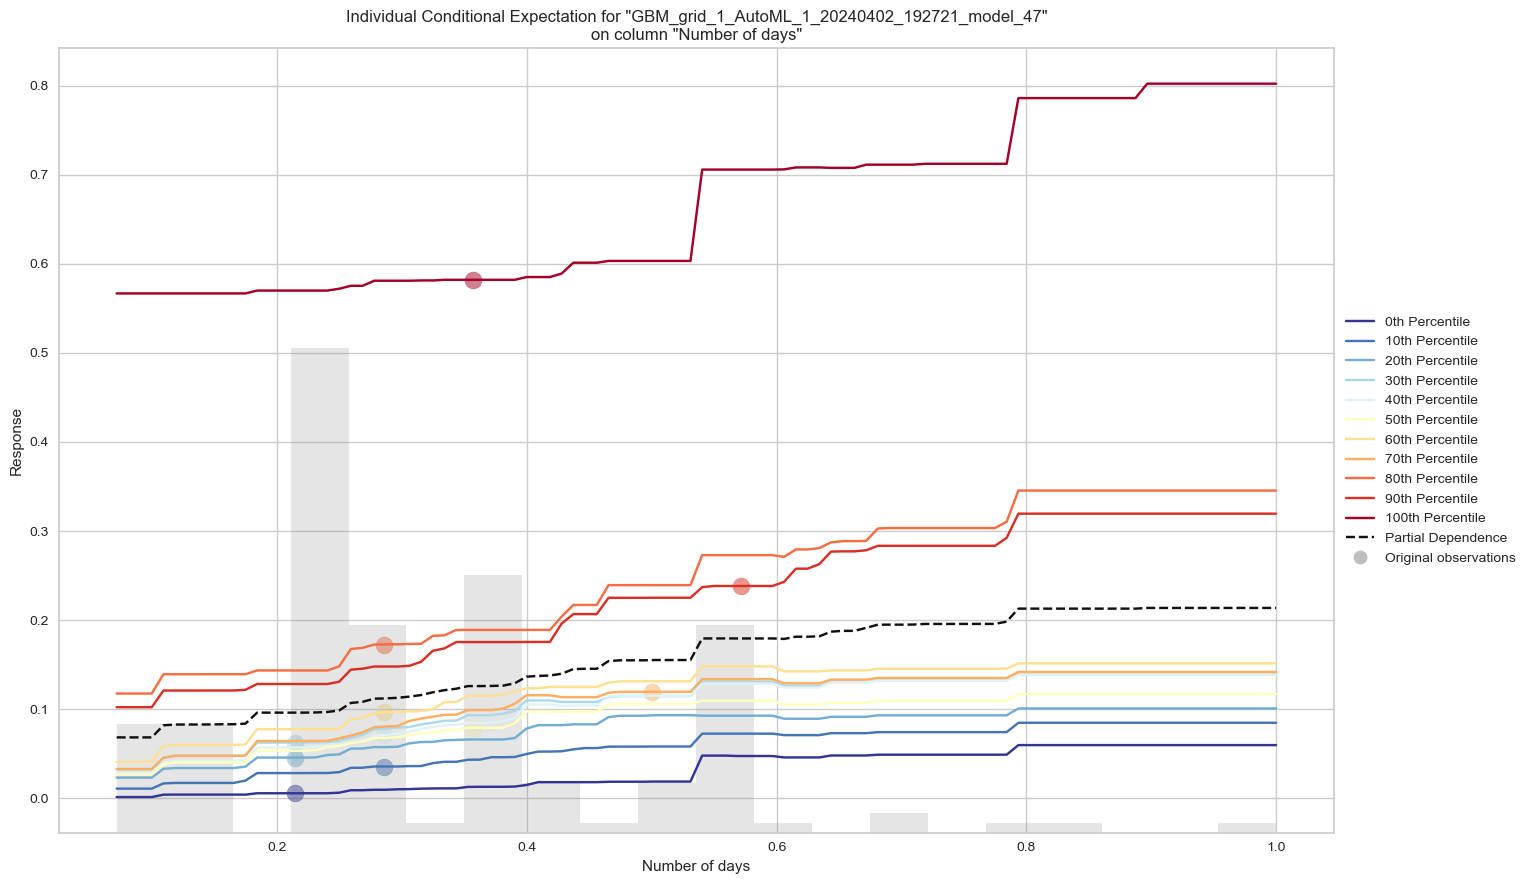

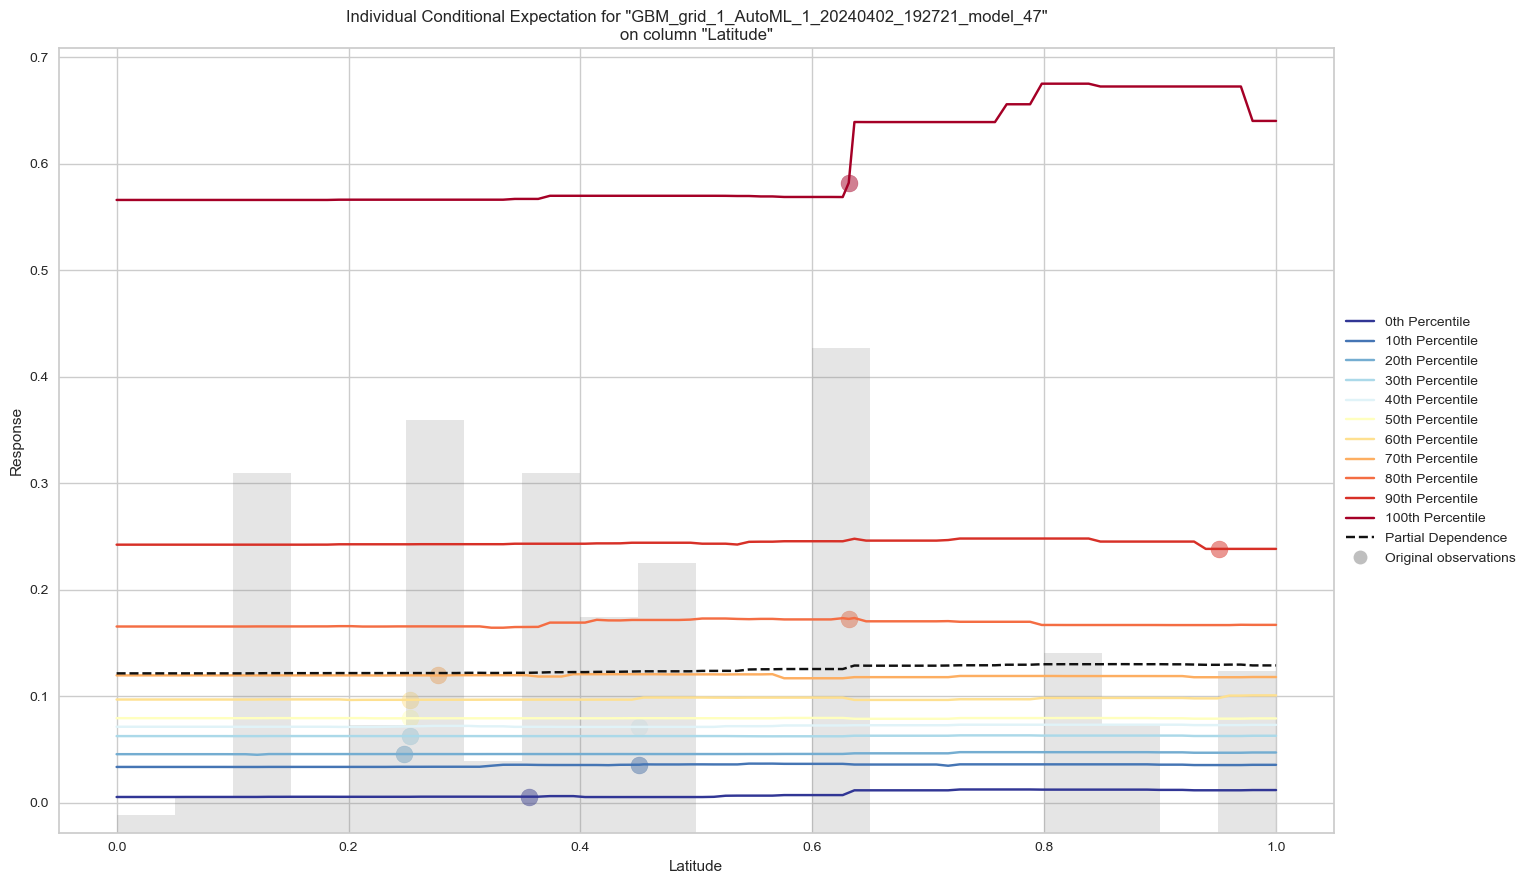

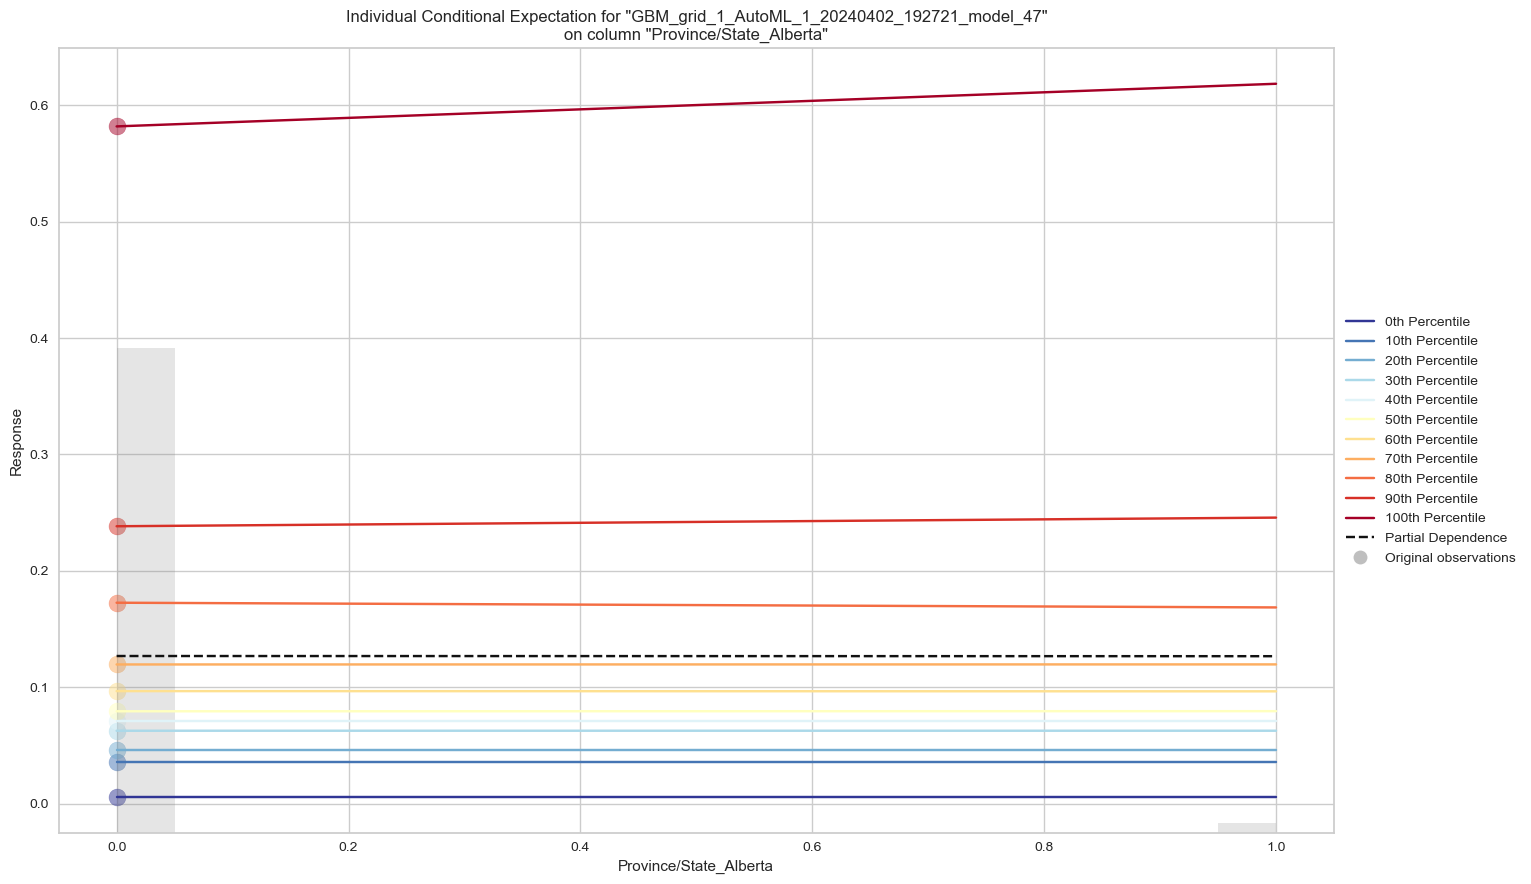

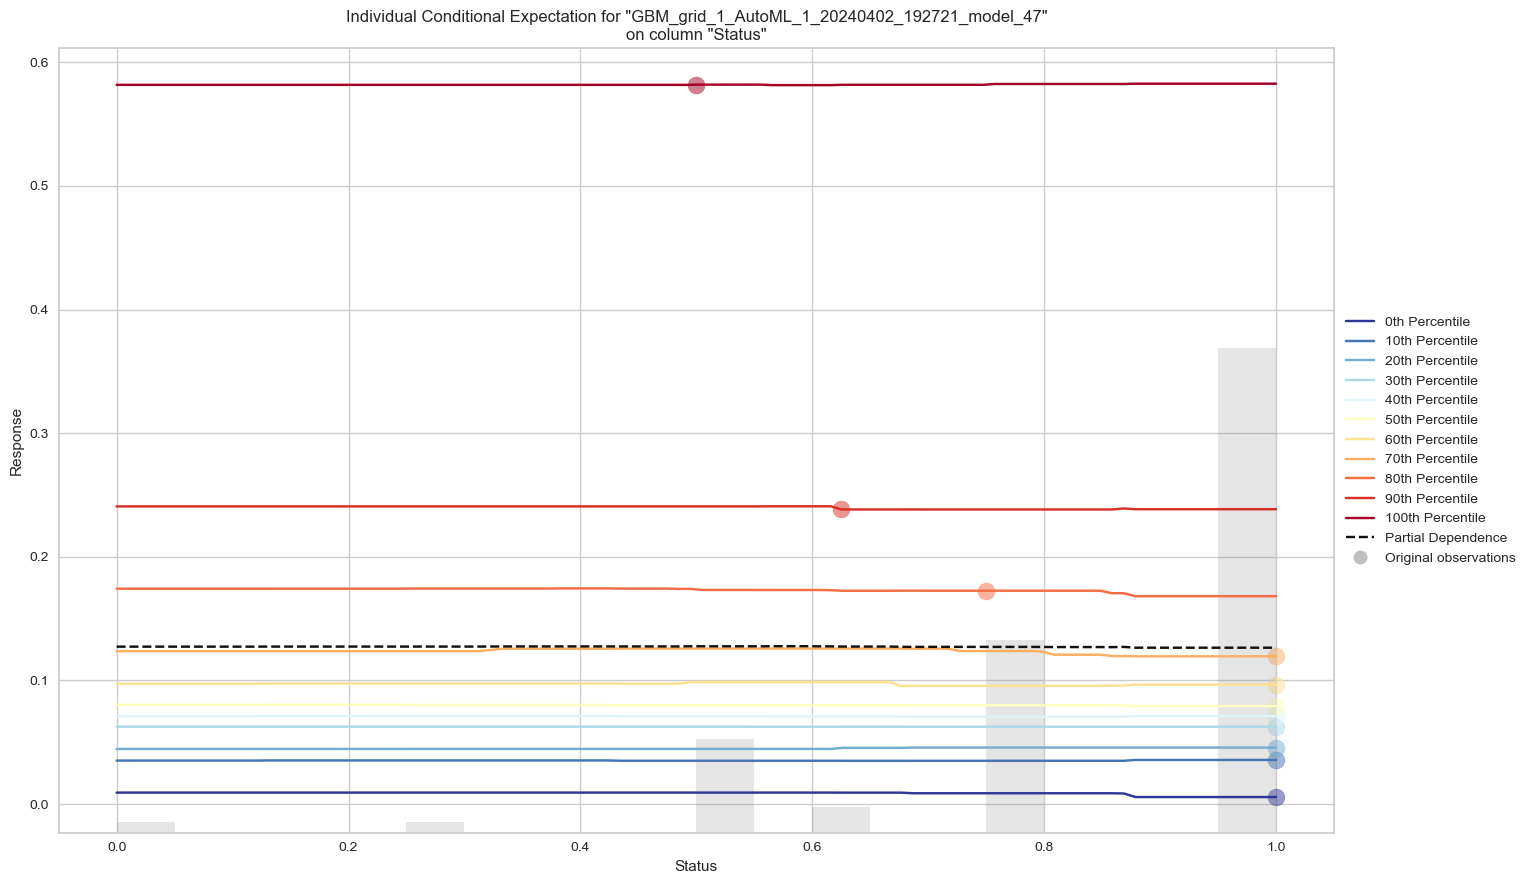

In [ ]:
exa = aml1.explain(df_h2o_test)

**Hyper Parameter tuning**

Hyperparameter tuning involves systematically searching through a range of hyperparameter values to find the optimal combination that maximizes a model's performance on a given dataset. By exhaustively exploring different hyperparameter settings, this process aims to enhance the model's effectiveness in capturing the underlying patterns within the data.

In [ ]:
s = data['Price']

t = data.drop(['Price'], axis = 1)

In [ ]:
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)

Here we use RandomizedSearchCV to get the best params inorder to acheive the optimal results.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)

C:\Users\subha\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
random_rf.best_params_

{'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 800}

n_estimators: The optimal number of decision trees in the random forest is found to be 200.

min_samples_split: For internal node splitting, the model achieves best performance when at least 5 samples are required.

max_depth: The maximum depth of individual decision trees in the forest is determined to be 800.

These hyperparameters play a crucial role in regulating the complexity and effectiveness of the Random Forest model, ensuring optimal performance based on the specified evaluation metric, which in this case is accuracy.

**Imputation Methods**

Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error
import random

# Define the percentages of data to be removed
percentages = [0.01, 0.05, 0.1]

# Create a function to calculate the percentage error
def calculate_percentage_error(original, imputed):
    return np.abs((original - imputed) / original) * 100

# Loop over the defined percentages
for percentage in percentages:
    # Remove the percentage of data from the dataset randomly
    data_missing = data.copy()
    ix = [(row, col) for row in range(data_missing.shape[0]) for col in range(data_missing.shape[1])]
    for row, col in random.sample(ix, int(round(percentage * len(ix)))):
        data_missing.iat[row, col] = np.nan

    # Impute the missing values using different methods
    # Method 1: Mean/Median Imputation
    imputer = SimpleImputer(strategy='mean') # or 'median'
    data_mean_imputed = imputer.fit_transform(data_missing)

    # Method 2: KNN Imputation
    knn_imputer = KNNImputer(n_neighbors=5)
    data_knn_imputed = knn_imputer.fit_transform(data_missing)

    # Method 3: MICE Imputation
    mice_imputer = IterativeImputer()
    data_mice_imputed = mice_imputer.fit_transform(data_missing)

    # Evaluate the imputation quality
    for original, imputed, method in zip([data]*3,
                                         [data_mean_imputed, data_knn_imputed, data_mice_imputed],
                                         ['Mean/Median', 'KNN', 'MICE']):
        mse = mean_squared_error(original, imputed)
        percentage_error = calculate_percentage_error(original, imputed)
        bias = np.mean(percentage_error)
        variance = np.var(percentage_error)

        print(f"Imputation method: {method}")
        print(f"Percentage of data removed: {percentage*100}%")
        print(f"Mean Squared Error: {mse}")
        print(f"Bias: {bias}")
        print(f"Variance: {variance}")
        print("\n")

Imputation method: Mean/Median
Percentage of data removed: 1.0%
Mean Squared Error: 0.00045325972311697414
Bias: inf
Variance: Price                      436.638755
Day price                   15.631105
Number of days             180.825054
Latitude                   593.593468
Species_Thinhorn Sheep            NaN
Species_Polar Bear                NaN
S Rank_S5                         NaN
Status                      26.550637
Classification_Ungulate      4.163747
Province/State_Alberta            NaN
dtype: float64


Imputation method: KNN
Percentage of data removed: 1.0%
Mean Squared Error: 9.219081653138512e-05
Bias: 0.2770182882082184
Variance: Price                        8.015001
Day price                    4.769520
Number of days              56.583145
Latitude                   108.457305
Species_Thinhorn Sheep       0.000000
Species_Polar Bear           0.000000
S Rank_S5                    0.000000
Status                       2.923224
Classification_Ungulate      0.706712
P

C:\Users\subha\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputation method: Mean/Median
Percentage of data removed: 5.0%
Mean Squared Error: 0.0029928242118744575
Bias: inf
Variance: Price                       2009.486006
Day price                  28707.597544
Number of days               889.207323
Latitude                     559.120495
Species_Thinhorn Sheep              NaN
Species_Polar Bear                  NaN
S Rank_S5                           NaN
Status                              NaN
Classification_Ungulate             NaN
Province/State_Alberta              NaN
dtype: float64


Imputation method: KNN
Percentage of data removed: 5.0%
Mean Squared Error: 0.0008295573759573499
Bias: inf
Variance: Price                       137.158559
Day price                  2862.049575
Number of days              272.144804
Latitude                    176.756770
Species_Thinhorn Sheep             NaN
Species_Polar Bear            0.000000
S Rank_S5                          NaN
Status                             NaN
Classification_Ungulate    

C:\Users\subha\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Based on the output, KNN imputation appears to be the most favorable choice, offering better prediction accuracy, lower bias, and stable performance across different scenarios of missing data. However, MICE imputation also shows competitive results, especially in handling specific features like 'Latitude', 'Number of days', and 'Price'. Mean/Median imputation, while simple, tends to result in lower prediction accuracy and higher bias and variance.

# Effect of Outliers

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
# df = pd.read_csv('path_to_your_data.csv')

# For this example, we assume the dataset is already loaded into `df` and 'Price' is the target variable
df = data.copy()

# Identify outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Data without outliers
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Splitting the data into features and target
X = df.drop('Price', axis=1)
y = df['Price']

X_no_outliers = df_no_outliers.drop('Price', axis=1)
y_no_outliers = df_no_outliers['Price']

# Split both datasets into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model with outliers
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_with_outliers = mean_squared_error(y_test, y_pred)

# Train the model without outliers
model.fit(X_train_no, y_train_no)
y_pred_no = model.predict(X_test_no)
mse_without_outliers = mean_squared_error(y_test_no, y_pred_no)

# Compare the performance
print(f'MSE with outliers: {mse_with_outliers}')
print(f'MSE without outliers: {mse_without_outliers}')


MSE with outliers: 0.0007714175732659379
MSE without outliers: 0.0001340535009677613


Remove outliers and keep outliers (does if have an effect of the final predictive model)?

A lower MSE means that the model with the outliers removed has a better fit to the data points. This suggests that outliers had a significant effect on the model, potentially skewing the results or causing the model to overfit to these extreme values.

**CONCLUSION**

Exploration into wildlife habitat pricing has unveiled crucial insights through a series of rigorous analyses:

Linear Regression (OLS): Unveiled core predictors such as Day price, Number of days, and Species, showcasing a robust model fit with an impressive R-squared of 0.966.

Random Forest: Reinforced the significance of Day price, Number of days, and Latitude, offering dependable predictions with an RMSE of 0.013.

AutoML (GBM): Automated feature selection underscored pivotal variables, resulting in strong predictive capabilities and an RMSE of 0.0127, efficiently optimizing model complexity.

Neural Network (NN): Delved into intricate patterns, demonstrating a train MAE of 0.022 and test MAE of 0.026 after 50 epochs, capturing nuanced interactions within the data.

SHAP Values & Feature Importance: Validated the pivotal role of Day price, Number of days, and Latitude as primary predictors, providing invaluable insights into their impact on wildlife habitat pricing.

Moreover, we implemented Ridge Regularization to enhance model stability and reduce overfitting, followed by the removal of outliers to observe its effect on model performance.

**LICENSE**

MIT License

Copyright (c) 2024 vineethreddy2000

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

**References** -

Mihalik, I., Bateman, A. W., & Darimont, C. T. (2019). Data from: Trophy hunters pay more to target larger-bodied carnivores [Data set]. Zenodo. https://doi.org/10.5061/dryad.vd34vr3

Sckit learn offcial documentation

Refered Towards Data Science

Eli5 official documentation

OpenAI's ChatGPT (personal communication, February 18, 2024) suggested the algorithms and code structure.

The algorithms were referred directly from the Sckit learn official documentation.

Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?).